<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 20px; 
    background: linear-gradient(125deg, #d73027 7%, #fdae61 47%, #a6d96a 85%, #1a9850 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        📚 Student Habits vs Academic Performance
    </h1>
</div>


### 📂 Dataset Overview

This is a simulated dataset exploring how lifestyle habits affect academic performance in students. With `1,000` synthetic student records and `15+` features including **study hours**, **sleep patterns**, **social media usage**, **diet quality**, **mental health**, and **final exam scores**, it’s perfect for ML projects, regression analysis, clustering, and data viz. Created using realistic patterns for educational practice.

Ever wondered how much Netflix, sleep, or TikTok scrolling affects your grades? 👀 This dataset simulates `1,000` students' daily habits—from study time to mental health—and compares them to final exam scores. It's like spying on your GPA through the lens of lifestyle. Perfect for EDA, ML practice, or just vibing with data while pretending to be productive.

### 🧾 Key Features

* **🧑‍🎓 Student Information**
`student_id`, `Age`, `gender`, `parental_education_level`

* **📚 Academic Performance**
`attendance_percentage`, `study_hours_per_day`

* **🧠 Well-being and Lifestyle**
  `sleep_hours`, `exercise_frequency`, `mental_health_rating`

* **📱 Digital & Leisure Habits**
`social_media_hours`, `netflix_hours`, `internet_quality`

* **🍽️ Diet & Daily Routine**
`diet_quality`

* **💼 Extracurricular & Work**
`part_time_job`, `extracurricular_participation`

* **▶️ Target Variable**
`exam_score`

### 📁 Files Provided

* `student_habits_performance.csv` (1000 samples): Contains all features (sources: [Kaggle Dataset](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance)) 

### 🎯 Project Objective

The primary objective of this notebook is to **build machine learning model to predict and EDA**.

Key components of the approach include:

* **🔍 Exploratory Data Analysis (EDA):** Understand feature distributions, relationships.
* **⚙️ Feature Engineering:** Encode categorical variables and align schema across training and test data.
* **📈 Modeling with XGBoost:** Train an ensemble model with hyperparameters tuned.
* **🔢 Multi-Label Prediction Strategy:** Generate predictions for each test row.
* **🧪 Evaluation Framework:**

  * Cross-validation.
  * Metrics: **R2** and **RMSE**.


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [1]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500) # To display all the columns of dataframe
pd.set_option('max_colwidth', None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>

In [142]:
# Load the datasets
df_student = pd.read_csv("D:/02_DATA/00_PYTHON/00_PYTHON_DATA_ANALYST/PYTHON_DATA_ANALYST/04_STUDENT_HABITS/student_habits_performance.csv")
# Verify shapes
print("Data Shape:", df_student.shape)

Data Shape: (1000, 16)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [143]:
# Display few rows of each dataset
df_student.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [144]:
# Display information about the DataFrames
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

#### Insights from Initial Data Exploration

**Dataset Size and Structure**
   - The **dataset** contains 1000 samples with 15 columns, including the target feature `exam_score`.

**Feature Overview**
   - **Numerical features:** age, study_hours_per_day, social_media_hours, netflix_hours, attendance_percentage, sleep_hours and exam_score.
   - **Categorical features:** gender, part_time_job, diet_quality, parental_education_level, internet_quality, extracurricular_participation, exercise_frequency and mental_health_rating

The column `student_id` is just number to identify this student in this dataset. So this column is not really a part of the information we should care about. We can drop this column or make it the index for this dataset.

**Data Consistency and Completeness**  
   - Only parental_education_level have **missing value** (909/1000).
   - Data types are appropriate: numerical features are integer and float, and categorical features are objects (strings).

In [145]:
df_student.drop("student_id", axis=1, inplace=True)

In [146]:
# convert type data for categorical feature to category
cat_features = ["gender",  "part_time_job",  "diet_quality",  "parental_education_level",  "internet_quality",  "extracurricular_participation",
                "exercise_frequency", "mental_health_rating"]

def convert_cat(df, cat_features= cat_features):
    for feature in cat_features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")
        else:
            pass

convert_cat(df=df_student)
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            1000 non-null   int64   
 1   gender                         1000 non-null   category
 2   study_hours_per_day            1000 non-null   float64 
 3   social_media_hours             1000 non-null   float64 
 4   netflix_hours                  1000 non-null   float64 
 5   part_time_job                  1000 non-null   category
 6   attendance_percentage          1000 non-null   float64 
 7   sleep_hours                    1000 non-null   float64 
 8   diet_quality                   1000 non-null   category
 9   exercise_frequency             1000 non-null   category
 10  parental_education_level       909 non-null    category
 11  internet_quality               1000 non-null   category
 12  mental_health_rating           1000

In [147]:
print("Data describe:")
cm = sns.light_palette("blue", as_cmap=True)
display(df_student.describe().T.style.background_gradient(cmap=cm))

Data describe:


,count,mean,std,min,25%,50%,75%,max
age,1000.000000,20.498000,2.308100,17.000000,18.750000,20.000000,23.000000,24.000000
study_hours_per_day,1000.000000,3.550100,1.468890,0.000000,2.600000,3.500000,4.500000,8.300000
social_media_hours,1000.000000,2.505500,1.172422,0.000000,1.700000,2.500000,3.300000,7.200000
netflix_hours,1000.000000,1.819700,1.075118,0.000000,1.000000,1.800000,2.525000,5.400000
attendance_percentage,1000.000000,84.131700,9.399246,56.000000,78.000000,84.400000,91.025000,100.000000
sleep_hours,1000.000000,6.470100,1.226377,3.200000,5.600000,6.500000,7.300000,10.000000
exam_score,1000.000000,69.601500,16.888564,18.400000,58.475000,70.500000,81.325000,100.000000


#### Descriptive Insights from Dataset Statistics

We examined the summary statistics of the numerical features across the datasets. The statistics include count, mean, standard deviation, minimum, quartiles, and maximum values.

**age**

- The age range from `17` to `24`, with a mean around `20.5` (very close to the median ⇒ the distribution is roughly symmetric, with no strong skewness) and a standard deviation of approximately `2.31` (Most students are within the range of 18 to 23 years old).
- The IRQ between `18.75` (25th percentile) and `23` (75th percentile), meaning 50% of students are between 18.75 and 23 years old.

**study_hours_per_day**

- The value in range from `0` to `8.3`, with a mean around `3.55` and a standard deviation is `3.5` (Most students are within the range of 0.05 to 7.05 hours to study per day).
- The IRQ between `2.6` (25th percentile) and `4.5` (75th percentile), meaning 50% of students are between 2.6 and 4.5 hours to study per day.

**social_media_hours**

- The value in range from `0` to `7.2`, with a mean around `2.5` and a standard deviation is `1.2` (Most students are within the range of 1.3 to 3.7 hours per day).
- The IRQ between `1.7` (25th percentile) and `3.3` (75th percentile), meaning 50% of students are between 1.7 and 3.3 hours per day.

**netflix_hours**

- The value in range from `0` to `5.4`, with a mean around `1.8` and a standard deviation is `1.07` (Most students are within the range of 0.73 to 2.87 hours per day).
- The IRQ between `1` (25th percentile) and `2.52` (75th percentile), meaning 50% of students are between 1 and 2.52 hours per day.

**attendance_percentage**

- The value in range from `56` to `100`, with a mean around `84.13` and a standard deviation is `9.4` (Most students are within the range of 74.73 to 93.53%).
- The IRQ between `78` (25th percentile) and `91` (75th percentile), meaning 50% of students are between 78 and 91%. This shows that the majority of students attend class regularly.

**sleep_hours**

- The value in range from `3.2` to `10`, with a mean around `6.47` and a standard deviation is `1.22` (Most students are within the range of 5.25 to 7.49 hours per day).
- The IRQ between `5.6` (25th percentile) and `7.3` (75th percentile), meaning 50% of students are between 1 and 2.52 hours per day. Many students do not get enough sleep (7 hours/day).

**exam_score**

- The value in range from `18.4` to `100`, with a mean around `69.6` and a standard deviation of approximately `16.9` (Most students are within the range of 52.7 to 86.5).
- The IRQ between `58.5` (25th percentile) and `81.3` (75th percentile), meaning 50% of students are between 58.5 and 81.3. 25% of students got F (< 59 points).

In [148]:
def classify_exercise(x):
    if x in [0, 1]:
        return "Very inactive"
    elif x in [2, 3]:
        return "Occasionally active"
    else:
        return "Frequently exercises"

df_student["exercise_frequency"] = df_student["exercise_frequency"].apply(classify_exercise)

def classify_mental_health(x):
    if x <= 3:
        return "Low well-being"
    elif x <= 6:
        return "Moderate well-being"
    else:
        return "High well-being"

df_student["mental_health_rating"] = df_student["mental_health_rating"].apply(classify_mental_health)

In [149]:
df_student.describe(include=["category", "object"]).T

,count,unique,top,freq
gender,1000,3,Female,481
part_time_job,1000,2,No,785
diet_quality,1000,3,Fair,437
exercise_frequency,1000,3,Frequently exercises,435
parental_education_level,909,3,High School,392
internet_quality,1000,3,Good,447
mental_health_rating,1000,3,High well-being,382
extracurricular_participation,1000,2,No,682


#### Insights on Categorical Features

**parental_education_level**: This feature has 909 non-null values → 91 missing values → consider handling missing data before using it in analysis. <br>
**part_time_job**: Most students do not have a part-time job (785 out of 1000). <br>
**diet_quality**: The most common diet quality is Fair(437), which might be a relevant factor when analyzing academic performance or health. <br>
**exercise_frequency**: Most student exercise frequently (`435`). <br>
**internet_quality**: Most students rate their internet connection as Good (`447`). <br>
**mental_health_rating**: The most common rating is High well-being (`382`), suggesting that many students feel positively about their mental health. <br>
**extracurricular_participation**: Majority of students do not participate in extracurricular activities (682 out of 1000).

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


#### Handling Missing Value

In [150]:
# Replace all missing values (NaN) in the parental_education_level column of df_student with the most common value (mode) from that column.
df_student["parental_education_level"] = df_student["parental_education_level"].fillna(df_student["parental_education_level"].mode()[0])

In [151]:
def missing_values_report(df = df_student):
    missing_count = df.isnull().sum().sum()
    rows = len(df)
    
    print("=" * 80)
    print(f" Missing Value Analysis")
    print("=" * 80)
    
    if missing_count == 0:
        print(f"✅ No missing values detected in {rows:,} rows")
    else:
        print(f"⚠️  {missing_count} missing values found in {rows:,} rows")
missing_values_report()

 Missing Value Analysis
✅ No missing values detected in 1,000 rows


#### Checking Duplicate Value

In [152]:
def check_duplicates_report(df=df_student):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 80)
    print(f"🔍 Duplicate Analysis")
    print("=" * 80)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

check_duplicates_report()

🔍 Duplicate Analysis
✅ No duplicates found in 1,000 rows


#### Checking Outlier Value

* Outliers are data points that significantly differ from other observations. Detecting and handling them is important because they can distort analysis and lead to incorrect conclusions. <br>
* Using the Interquartile Range (IQR) Method : The IQR method identifies outliers as values `below Q1 - 1.5 * IQR` or `above Q3 + 1.5 * IQR`. <br>
* If the outlier count is 0, that column has no outliers. <br>
* If the outlier count is greater than 0, that column contains outliers.

In [153]:
def checking_outlier(list_feature, df = df_student):
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            outlier_detail = ""
        else:
            outlier_detail = outliers.tolist()
        outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            "Outlier Detail": outlier_detail
        })
    return pd.DataFrame(outlier_info)

# Source: https://www.geeksforgeeks.org/data-science/detect-and-remove-the-outliers-using-python/
def remove_outlier(list_feature, df = df_student):
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

In [154]:
num_feature = ["age", "study_hours_per_day", "social_media_hours", "netflix_hours", "attendance_percentage", "sleep_hours", "exam_score"]
all_feature = num_feature + cat_features
checking_outlier(list_feature=num_feature)

,Feature,Outlier Count,Outlier Detail
0,age,0,
1,study_hours_per_day,7,"[7.4, 7.4, 8.3, 7.4, 7.5, 8.2, 7.6]"
2,social_media_hours,5,"[6.2, 6.0, 6.1, 5.7, 7.2]"
3,netflix_hours,4,"[5.0, 5.4, 5.3, 4.9]"
4,attendance_percentage,3,"[57.6, 56.7, 56.0]"
5,sleep_hours,2,"[10.0, 10.0]"
6,exam_score,2,"[18.4, 23.1]"


| Feature                    | Outlier Observation                  | Should Remove?       | Reason for Keeping                                                               |
| -------------------------- | ------------------------------------ | -------------------- | -------------------------------------------------------------------------------- |
| **study\_hours\_per\_day** | 7 high values (7.4–8.3 hours)        | ❌ Do not remove      | Some students may study very hard, especially near exam time.                               |
| **social\_media\_hours**   | 5 fairly high values (6.2–7.2 hours) | ❌ Do not remove      | Using social media for 6–7 hours a day is realistic among young people.                     |
| **netflix\_hours**         | 4 values (4.9–5.4 hours)             | ❌ Do not remove      | May reflect students "addicted" to Netflix – noteworthy, not erroneous.                     |
| **attendance\_percentage** | 3 low values (56–57%)                | ❌ Do not remove      | These students were absent nearly 50% of their classes in one semester. That's not uncommon.|
| **sleep\_hours**           | 2 high values (10 hours)             | ❌ Do not remove      | Sleeping 10 hours isn’t unreasonable – could be due to flexible study schedules.            |
| **exam\_score**            | 2 low values (18.4, 23.1)            | ❌ Do not remove      | It's normal for some students to perform poorly, and it’s important to analyze.             |


#### Data Quality Insights: Missing Values, Duplicates and Outliers.

**Missing Values Analysis**

- We conducted a thorough check for missing values in datasets.  
- Finished handling missing value for feature `parental_education_level`.

**Duplicate Records Analysis**

- We examined the datasets for duplicate rows that could bias the model or inflate performance metrics.  
- **No duplicate records** were found in dataset, confirming the uniqueness and integrity of 0 duplicates out of `1000` rows.
- The absence of duplicates ensures that the model will not be trained or evaluated on repeated data points, which helps maintain the reliability of results.

**Outliers Records Analysis**
- We also examined the datasets for checking outliers.
- **The outliers** were found in dataset at features: `study_hours_per_day`, `social_media_hours`, `netflix_hours`, `attendance_percentage`, `sleep_hours`, `exam_score`. But we can not remove them since these outliers reflect reality.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis (EDA)
    </h1>
</div>


**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA
| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated
| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [155]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected = False, show_residuals = False):
    """
    Performs Chi-Square test of independence and visualizes the relationship between two categorical variables. <br>
    https://www.scribbr.com/statistics/chi-square-test-of-independence
    Parameters:
        cat_feature (str): Name of the categorical feature.
        target_feature (str): Name of the target categorical feature.
        df (pd.DataFrame): Input dataset.
        show_expected (bool): Whether to print expected frequencies. Default is False.
        show_residuals (bool): Whether to calculate and plot standardized residuals. Default is False.

    Returns:
        None - Prints test statistics, expected frequencies, and plots visualizations.
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("🟢 Significant relationship found between variables (reject H₀).")
    else:
        print("⚪ No significant relationship found (fail to reject H₀).")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\n📈 Standardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(8, 6))
        sns.heatmap(residuals, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result = False):
    """
    Performs Shapiro-Wilk test to check for normal distribution of a numeric feature across groups. <br>
    https://www.statskingdom.com/shapiro-wilk-test-calculator.html
    Parameters:
        cat_feature (str): Name of the categorical feature.
        num_feature (str): Name of the numeric feature to test.
        df (pd.DataFrame): Input dataset.
        plot_result (bool): Show plot. Default is False.

    Returns:
        None - Prints test results and plots a histogram.
    """
    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p:.6f}")
            if p > 0.05:
                print(f"  🟢 {group} appears to follow a normal distribution.\n")
            else:
                print(f"  ⚪ {group} does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Performs Levene’s test to assess the equality of variances across groups. <br>
    https://www.geeksforgeeks.org/levenes-test
    Parameters:
        dataframe (pd.DataFrame): The input dataset.
        categorical_feature (str): The name of the column representing the grouping variable (categorical).
        num_feature (str): The name of the column containing the numeric values to compare.
        center (str): Either 'mean' or 'median' — specifies the center of the distribution for the test.

    Returns:
        None - Prints the test statistic and conclusion.
    """
    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature, show_plot = False):
    """
    Performs Mann-Whitney U test (also known as Wilcoxon rank-sum test) to check for significant difference between two independent groups.
    https://library.virginia.edu/data/articles/the-wilcoxon-rank-sum-test
    Parameters:
        dataframe (pd.DataFrame): The input dataset.
        categorical_feature (str): The name of the column representing the grouping variable (categorical).
        num_feature (str): The name of the column containing the numeric values to compare.
        plot_result (bool): Show plot. Default is False.

    Returns:
        None - Prints the test statistic and conclusion.
    """

    # Extract unique groups
    groups = dataframe[categorical_feature].dropna().unique()
    
    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return
    else:
        print(f"🔍 Mann-Whitney U test: {num_feature} ~ {categorical_feature}")
        # Extract values for each group
        group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
        group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

        # Perform Mann-Whitney U test
        stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

        # Output results
        print(f"Mann-Whitney U statistic: {stat:.3f}")
        print(f"p-value: {p}")
        if p <= 0.05:
            print("🟢 There is a significant difference between the two groups.")
            n1, n2 = len(group1), len(group2)
            mean_U = n1 * n2 / 2
            std_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
            z = (stat - mean_U) / std_U
            r = z / np.sqrt(n1 + n2)
            # Interpret effect size
            if abs(r) < 0.1:
                interpretation = "Very small/negligible effect"
            elif abs(r) < 0.3:
                interpretation = "Small effect"
            elif abs(r) < 0.5:
                interpretation = "Medium effect"
            else:
                interpretation = "Large effect"
            print(f"📘 Interpretation: {interpretation}")
        else:
            print("⚪ There is no significant difference between the two groups.")

        # Show boxplot
        if show_plot:
            sns.boxplot(data=dataframe, x=categorical_feature, y=num_feature, palette="Set2")
            plt.title(f"Boxplot of {num_feature} by {categorical_feature}", fontsize=14, weight="bold")
            plt.tight_layout()
            plt.show()
        else:
            pass

def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False, show_plot = False):
    """
    Performs Independent T-Test between two groups and calculates Cohen's d. <br>
    https://www.scribbr.com/statistics/t-test/
    Parameters:
        data (pd.DataFrame): Input DataFrame.
        categorical_feature (str): Column name for grouping variable (categorical).
        num_feature (str): Column name for the numeric feature to compare.
        plot_result (bool): Show plot. Default is False.

    Returns:
        None - Prints T-test results and Cohen's d value.
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")
        
        # Show boxplot
        if show_plot:
            sns.boxplot(data=data, x=categorical_feature, y=num_feature, palette="Set2")
            plt.title(f"Boxplot of {num_feature} by {categorical_feature}", fontsize=14, weight="bold")
            plt.tight_layout()
            plt.show()
        else:
            pass

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2, plot=False):
    """
    Performs ANOVA and Tukey's HSD post-hoc test if needed. <br>
    https://www.scribbr.com/statistics/one-way-anova/
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        numeric_feature (str): Name of the numerical response variable.
        categorical_feature (str): Name of the categorical variable (independent).
        typ (int): Type of sum of squares to use (1, 2, or 3). Default is 2.
        plot (bool): Show plot. Default is False.

    Returns:
        None - Prints ANOVA results and optionally Tukey's HSD results.
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

        if plot:
            sns.boxplot(data=df, x=categorical_feature, y=numeric_feature, palette="Set2")
            plt.title(f"Boxplot of {numeric_feature} by {categorical_feature}", fontsize=14, weight="bold")
            plt.tight_layout()
            plt.show()
        else:
            pass

def perform_kruskal_test(df, categorical_feature, numeric_feature, plot = False):
    """
    Performs Kruskal-Wallis H-test for independent samples. <br>
    https://www.geeksforgeeks.org/kruskal-wallis-test
    Parameters:
        df (pd.DataFrame): Dataset.
        categorical_feature (str): Categorical column name.
        numeric_feature (str): Numerical column name.
        plot (bool): Show plot. Default is False.

    Returns:
        None - Prints Kruskal-Wallis test results.
    """
    import scikit_posthocs as sp
    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

        # Boxplot
        if plot:
            sns.boxplot(data=df, x=categorical_feature, y=numeric_feature, palette="Set2")
            plt.title(f"Boxplot of {numeric_feature} by {categorical_feature}", fontsize=14, weight="bold")
            plt.tight_layout()
            plt.show()
        else:
            pass

## Exam Score Distribution

In [ ]:
df_student["exam_score_cat"] = pd.cut(df_student["exam_score"],
                                      bins = [-0.1, 59, 69, 79, 89, 100],
                                      labels=["F", "D", "C", "B", "A"])

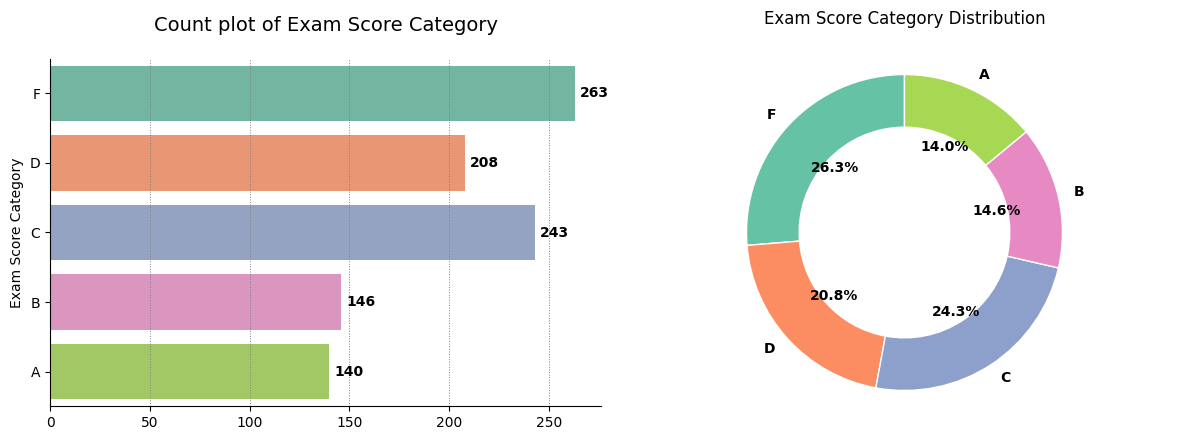

In [157]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12, 4.5))

sns.countplot(data=df_student, y = "exam_score_cat", ax=ax[0], palette="Set2")
ax[0].set_title(f"Count plot of Exam Score Category", fontsize=14, pad=20)
ax[0].set_ylabel("Exam Score Category")
ax[0].set_xlabel("")
ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

for p in ax[0].patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax[0].text(width + max(df_student["exam_score_cat"].value_counts())*0.01, y,
            f'{int(width)}', 
            ha="left", va="center", fontsize=10, fontweight="bold", color="black")

fertilizer_counts = df_student["exam_score_cat"].value_counts().sort_index()
wedges, texts, autotexts = ax[1].pie(
    fertilizer_counts,
    labels=fertilizer_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("Set2", len(fertilizer_counts)),
    wedgeprops=dict(width=0.4, edgecolor="w"),
    radius=1.2
)

for text in texts + autotexts:
    text.set_fontsize(10)
    text.set_fontweight('bold')

centre_circle = plt.Circle((0, 0), 0.70, fc="white")
ax[1].add_artist(centre_circle)
ax[1].set_title(f"Exam Score Category Distribution", pad=25)
ax[1].axis("equal")

plt.tight_layout()
plt.show()

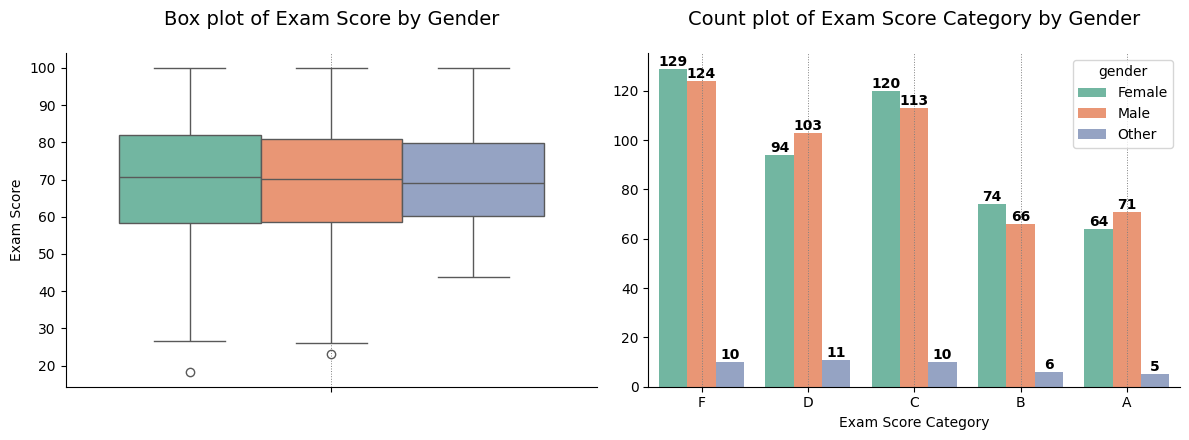

In [158]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12, 4.5))

sns.boxplot(data=df_student, y = "exam_score", ax=ax[0], palette="Set2", hue="gender")
ax[0].set_title(f"Box plot of Exam Score by Gender", fontsize=14, pad=20)
ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
ax[0].set_ylabel("Exam Score")
sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)
ax[0].legend().remove()

sns.countplot(data=df_student, x = "exam_score_cat", ax=ax[1], palette="Set2", hue="gender")
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")
ax[1].set_title(f"Count plot of Exam Score Category by Gender", fontsize=14, pad=20)
ax[1].set_xlabel("Exam Score Category")
ax[1].set_ylabel("")
ax[1].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)
plt.tight_layout()
plt.show()

In [159]:
cal_shapiro(cat_feature="gender", num_feature="exam_score", df=df_student)
# cal_levene(dataframe=df_student_new, categorical_feature="gender", num_feature="exam_score")
perform_kruskal_test(df=df_student, categorical_feature="gender", numeric_feature="exam_score")

🔎 Shapiro-Wilk Normality Test for exam_score across gender groups
Group: Female
  Shapiro-Wilk statistic: 0.986
  p-value: 0.000170
  ⚪ Female does not appear to follow a normal distribution.

Group: Male
  Shapiro-Wilk statistic: 0.985
  p-value: 0.000085
  ⚪ Male does not appear to follow a normal distribution.

Group: Other
  Shapiro-Wilk statistic: 0.975
  p-value: 0.489758
  🟢 Other appears to follow a normal distribution.


🔍 Kruskal-Wallis Test: exam_score ~ gender
Kruskal-Wallis H-statistic: 0.150
p-value: 0.9277090197527547

ℹ️ No significant difference found (p >= 0.05)


#### Insights into Exam Score Distribution

**Frequency of Exam score category (exam_score_cat)**

- The count plot reveal the absolute counts of each type in the dataset:
- Type `F` is the most exam score category with 263 occurrences, accounting for approximately `26.3%` of the dataset.
- Type `C` and `D` are also highly prevalent, with `243` occurrences (24.3%) and `208` (20.8%).
- Type `A` and `B` have lowest count at `140` and `146` representing `14%` and `14.6%` of the dataset.

**Exam Score Distribution by Gender**

- The median exam scores are nearly the same for Female, Male, and Other groups.
- The score distribution of female includes the score distribution of the other two genders. In other words, there was no difference in scores between the groups.
- For grade F (lowest), Female students have the highest count (129), slightly higher than Male (124). However, for grade A (highest), Male students lead (71) compared to Female (64).
- Clearly visible in the count plot: the “Other” group has only about 5–11, compared to 64–130 in the other groups.

***F and D scores account for most of the dataset with 47%. This shows a decline in student learning. In addition, the score distribution between groups (gender) is not significant  different, but the score distribution of the Other group is better than the other two groups.***

## Numerical Feature Distributions

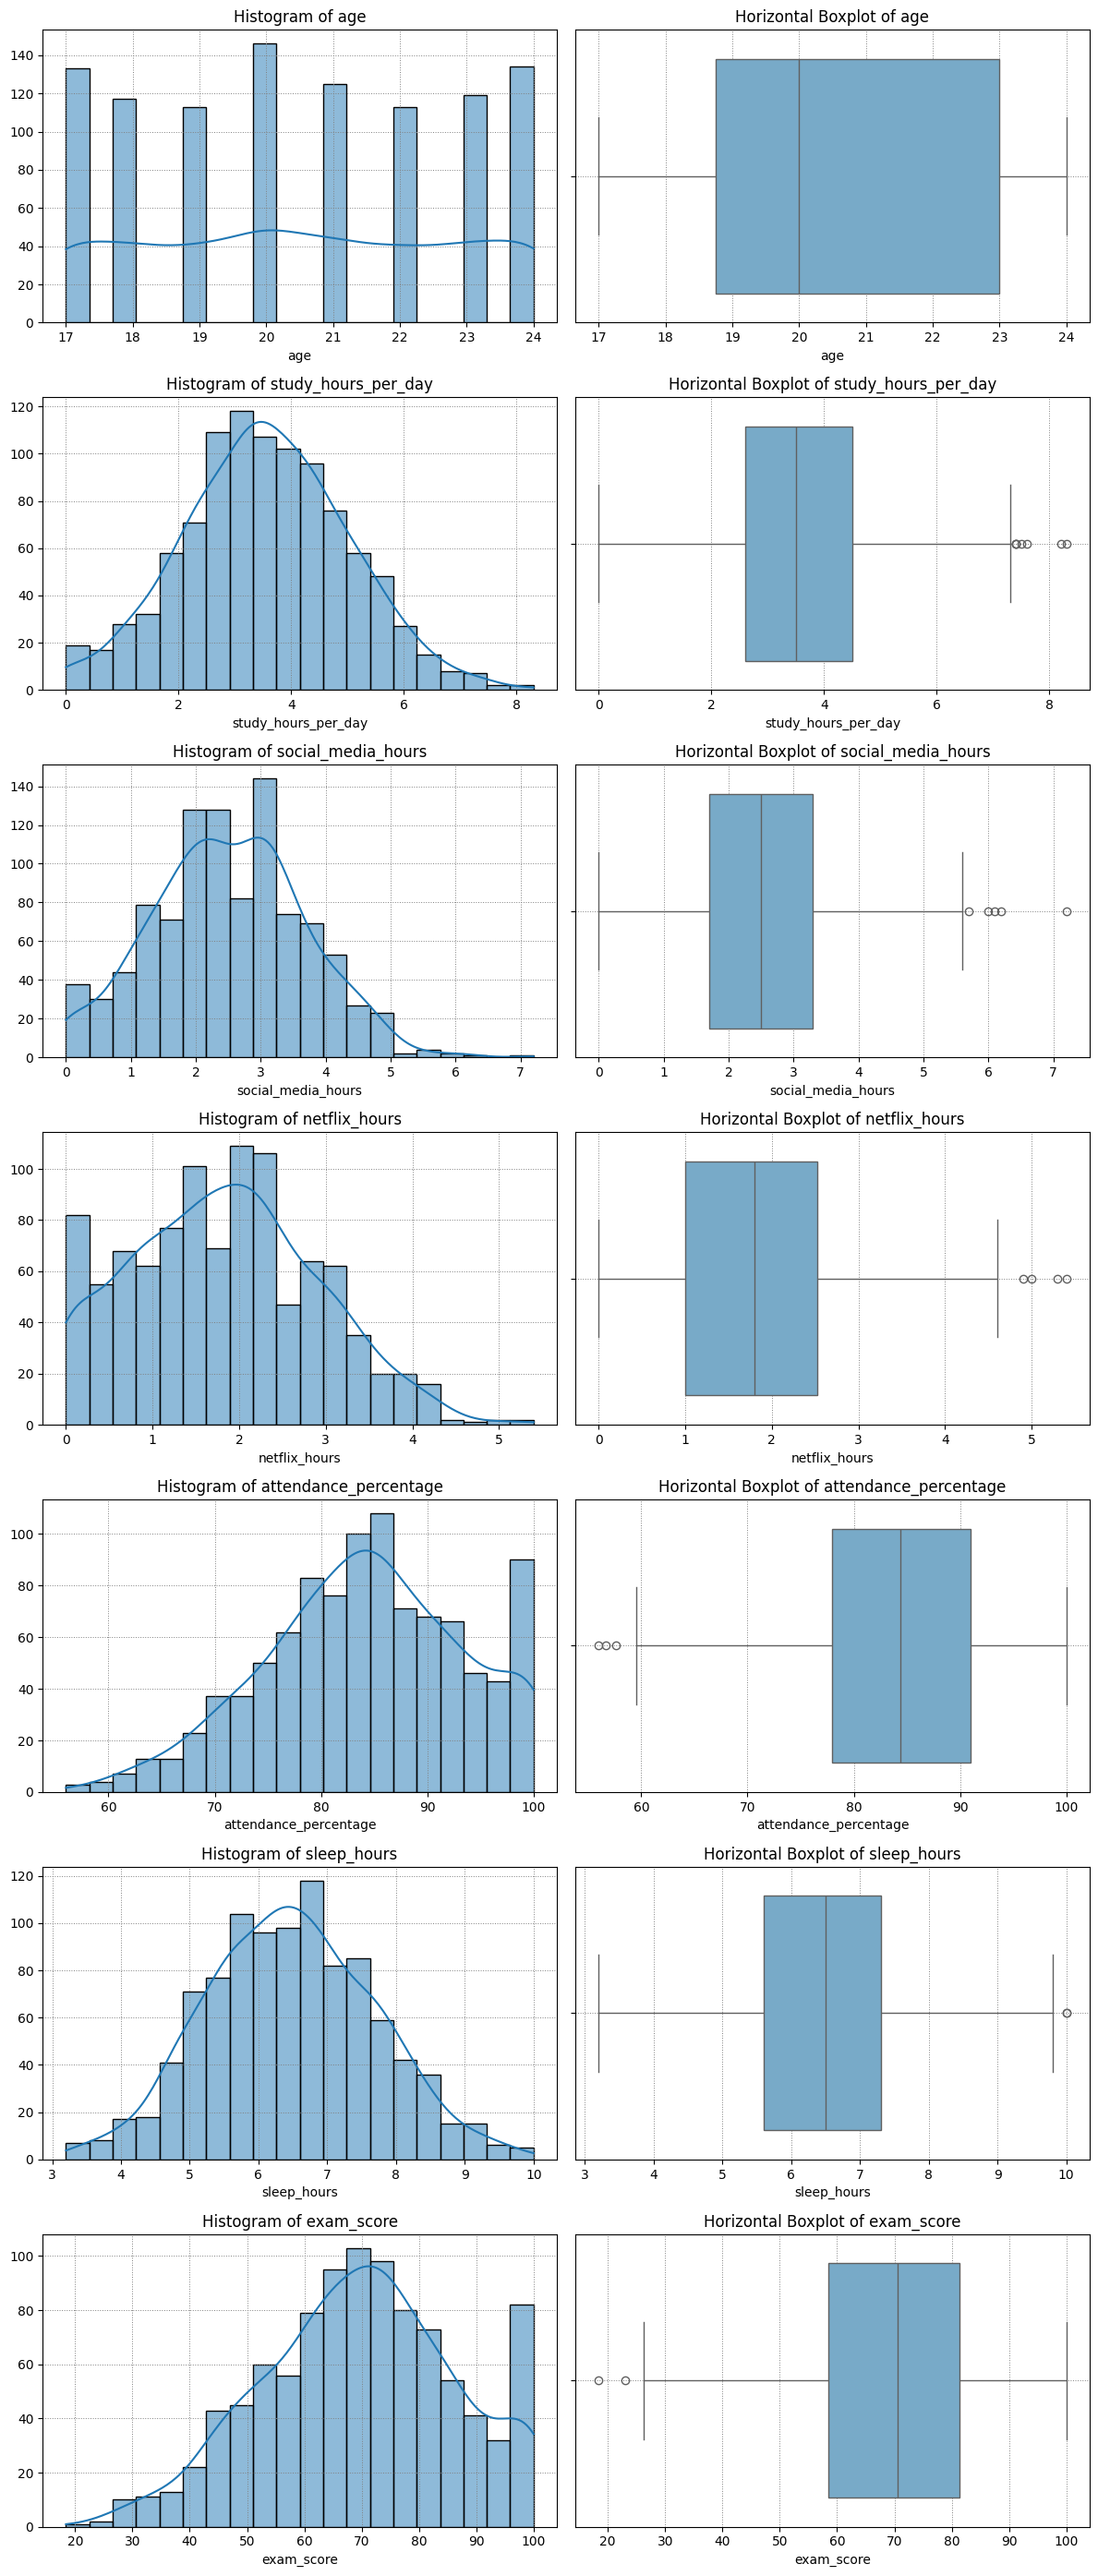

In [160]:
def plot_numerical_features(df=df_student, numerical_features = num_feature):
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, len(numerical_features)*4))
    axes = np.atleast_2d(axes)

    for i, feature in enumerate(numerical_features):
        sns.histplot(data=df_student[feature], palette="Blues", bins = 20, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f"Histogram of {feature}")
        axes[i, 0].set_ylabel("")
        # axes[i, 0].set_facecolor("lightgray")
        axes[i, 0].grid(color="gray", linestyle=":", linewidth=0.7)

        sns.boxplot(data=df_student[feature], palette="Blues", orient="h", ax=axes[i, 1])
        axes[i, 1].set_title(f"Horizontal Boxplot of {feature}")
        axes[i, 1].set_xlabel(feature)
        # axes[i, 1].set_facecolor("lightgray")
        axes[i, 1].grid(color="gray", linestyle=":", linewidth=0.7)

    plt.tight_layout()
    plt.show()
plot_numerical_features()

In [161]:
def check_skewness(data = df_student, numerical_features = num_feature, highlight=True, sort=True):
    skewness_dict = {}
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient='index', columns=['Skewness'])
    if sort:
        skew_df = skew_df.reindex(skew_df['Skewness'].abs().sort_values(ascending=False).index)
    
    print(f"\n🔍 Skewness for dataset:")
    print("-"*60)
    print(f"{'Feature':<21} | {'Skewness':<10} | {'Remark'}")
    print("-"*60)
    for feature, row in skew_df.iterrows():
        skew = row['Skewness']
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ''
        endc = '\033[0m' if color else ''
        if highlight and color:
            print(f"{color}{feature:<21} | {skew:>+9.4f} | {remark}{endc}")
        else:
            print(f"{feature:<21} | {skew:>+9.4f} | {remark}")
    print("-"*60)
    return skew_df

skew_data = check_skewness()


🔍 Skewness for dataset:
------------------------------------------------------------
Feature               | Skewness   | Remark
------------------------------------------------------------
attendance_percentage |   -0.2378 | Approximately symmetric
netflix_hours         |   +0.2372 | Approximately symmetric
exam_score            |   -0.1564 | Approximately symmetric
social_media_hours    |   +0.1198 | Approximately symmetric
sleep_hours           |   +0.0915 | Approximately symmetric
study_hours_per_day   |   +0.0543 | Approximately symmetric
age                   |   +0.0084 | Approximately symmetric
------------------------------------------------------------


#### Insights on Numerical Feature Distributions

**Shape and Spread of Distributions**

- **Histograms** reveal that all features are distributed fairly evenly across their respective ranges.
- **Boxplots** confirm that the central 50% of values (the interquartile range), and the whiskers (showing the range).

**Skewness Analysis**

- The **skewness values** for all numerical features in each dataset are less than 0.5, indicating that the distributions are **approximately symmetric**.
- No feature exhibits moderate or high skewness (|skewness| > 0.5), which means:
  - There is no need for transformations like log or Box-Cox to normalize these features.
  - Most machine learning algorithms will be able to handle these features without bias due to skewed distributions.

## Correlation Analysis of Numerical Features

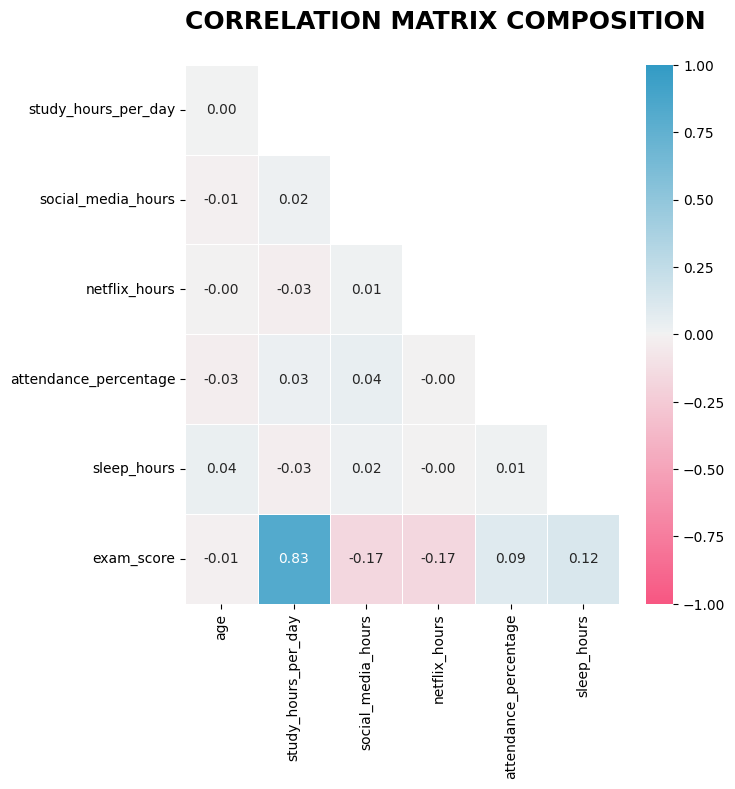

In [162]:
corr_matrix = df_student.corr(numeric_only=True)
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (7, 7))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = 'CORRELATION MATRIX COMPOSITION\n'
ax.set_title(title, loc='left', fontsize=18, weight="bold");

#### Insights from Correlation Analysis of Numerical Features

**Overall Weak Correlations:** Most correlation coefficients are close to zero, indicating **little to no linear relationship** between pairs of features with target_feature such as age, social_media_hours, netflix_hours, attendance_percentage and sleep_hours.

**Feature Independence**: Features like **social_media_hours, netflix_hours, attendance_percentage, sleep_hours, study_hours_per_day and exam_score** are essentially uncorrelated with with each other. Except for the correlation between `study_hours_per_day` and `exam_score`, the correlation coefficient is `0.83`, indicating that spending more time studying will improve the score.

**Implications for Modeling**

- The near-zero correlations imply that each numerical feature provides **unique, non-redundant information**.
- This independence is beneficial because it reduces **multicollinearity** issues in models, allowing algorithms to learn the distinct impact of each feature without confounding effects.
- However, the lack of strong linear relationships suggests that **complex or non-linear models** (e.g., tree-based methods, neural networks) might better capture interactions or subtle patterns that linear correlation does not reveal.


## Categorical Feature Distributions

In [163]:
# Function to display barplot and pie chart for categorical columns
def plot_categorical_distribution(feature, df = df_student):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12, 4.5))

    sns.countplot(data=df, y = feature, ax=ax[0], palette="Set2")
    ax[0].set_title(f"Count plot of {feature}", fontsize=14, pad=20)
    ax[0].set_ylabel(feature)
    ax[0].set_xlabel("")
    ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
    sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

    for p in ax[0].patches:
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax[0].text(width + max(df[feature].value_counts())*0.01, y,
                f'{int(width)}', 
                ha="left", va="center", fontsize=10, fontweight="bold", color="black")

    fertilizer_counts = df[feature].value_counts().sort_index()
    wedges, texts, autotexts = ax[1].pie(
        fertilizer_counts,
        labels=fertilizer_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("Set2", len(fertilizer_counts)),
        wedgeprops=dict(width=0.4, edgecolor="w"),
        radius=1.2
    )

    for text in texts + autotexts:
        text.set_fontsize(10)
        text.set_fontweight('bold')

    centre_circle = plt.Circle((0, 0), 0.70, fc="white")
    ax[1].add_artist(centre_circle)
    ax[1].set_title(f"Percentage Distribution of {feature}", pad=25)
    ax[1].axis("equal")

    plt.tight_layout()
    plt.show()

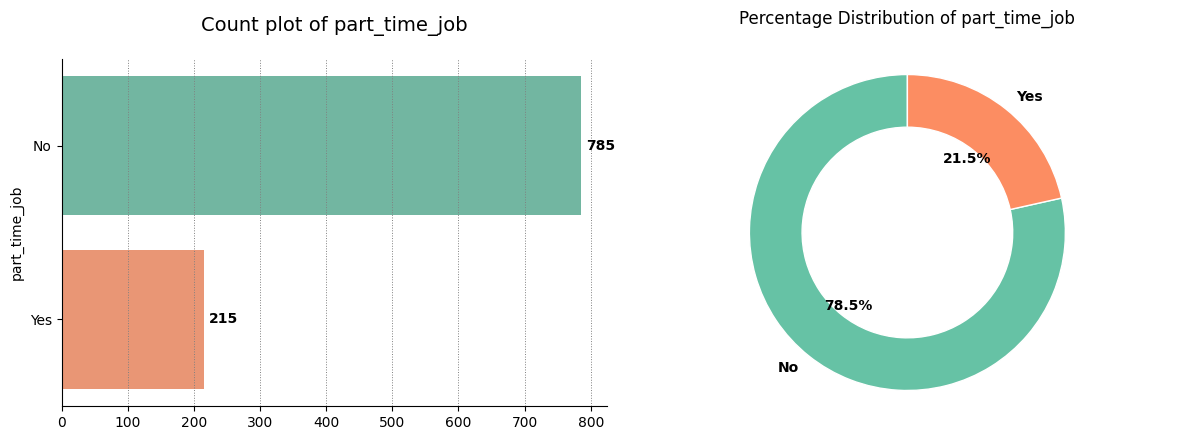

In [164]:
plot_categorical_distribution(feature="part_time_job")

**part_time_job:** There are `785` people who do not work overtime, accounting for `78.5%`. On the contrary, there are only `215` people who work after school hours, accounting for `21.5%`.

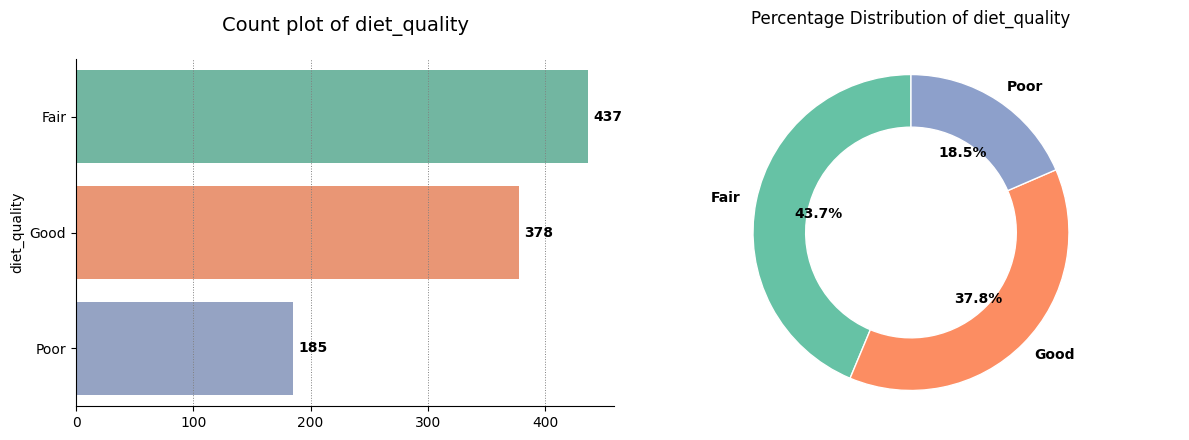

In [165]:
plot_categorical_distribution(feature="diet_quality")

**diet_quality:** <br>
- The most common categories are **Fair** (43.7%) and **Good** (37.8%). The fact that "Fair" dominates suggests that most students have a moderate diet, neither particularly good nor poor.
- The **Poor** category represents only 18.5%.

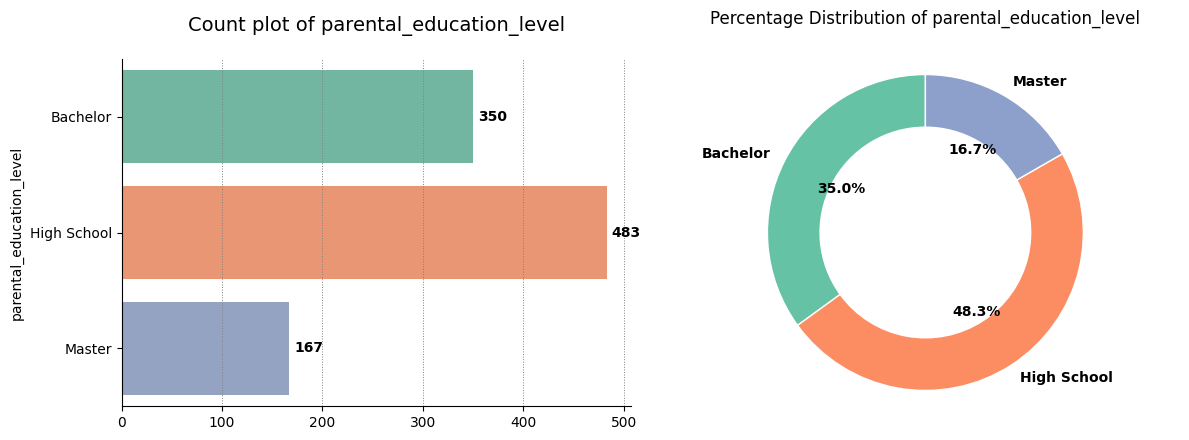

In [166]:
plot_categorical_distribution(feature="parental_education_level")

**parental_education_level:** <br>
- The majority of parents have a High School education with 48.3%.
- About one-third hold a Bachelor’s degree.
- Only a small portion (under 17%) have a Master’s degree.

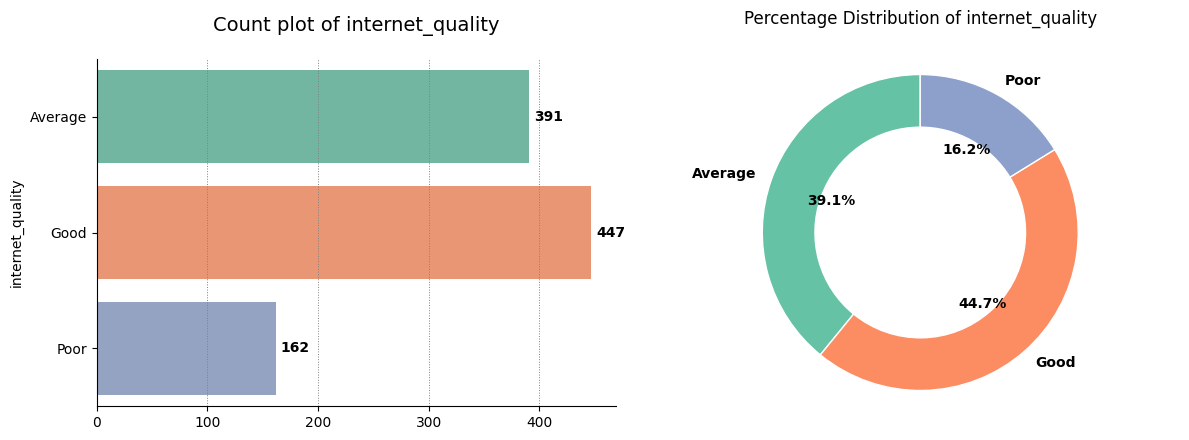

In [167]:
plot_categorical_distribution(feature="internet_quality")

**internet_quality:** <br>
- Nearly half of the students have good internet quality, which likely supports their online learning and research.
- A significant portion (39.1%) report average quality, which may occasionally affect their learning experience.
- 16.2% of students still suffer from poor internet, which could impact their academic performance or participation in online activities. 

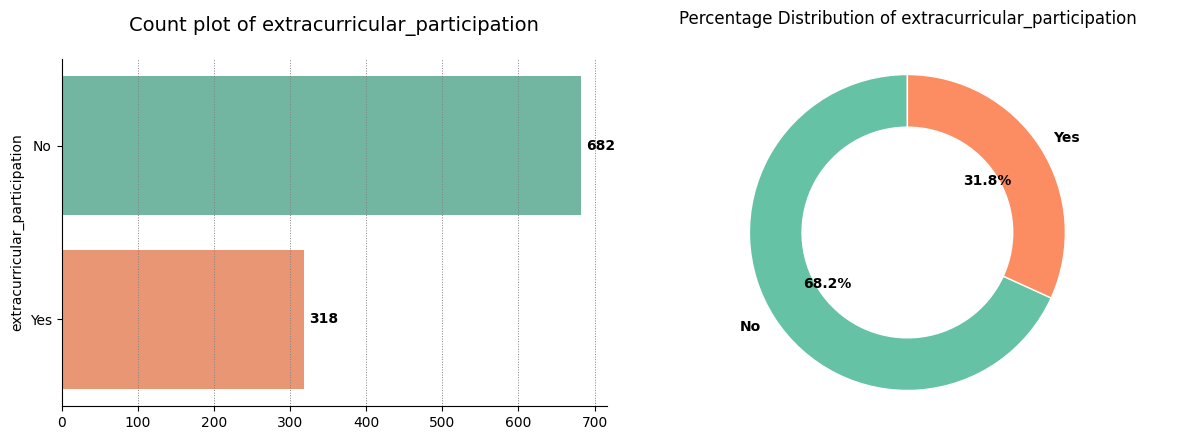

In [168]:
plot_categorical_distribution(feature="extracurricular_participation")

**extracurricular_participation:** <br>
- Only about one-third of students (31.8%) participate in extracurricular activities.
- A large majority (68.2%) do not engage in any extracurricular involvement.

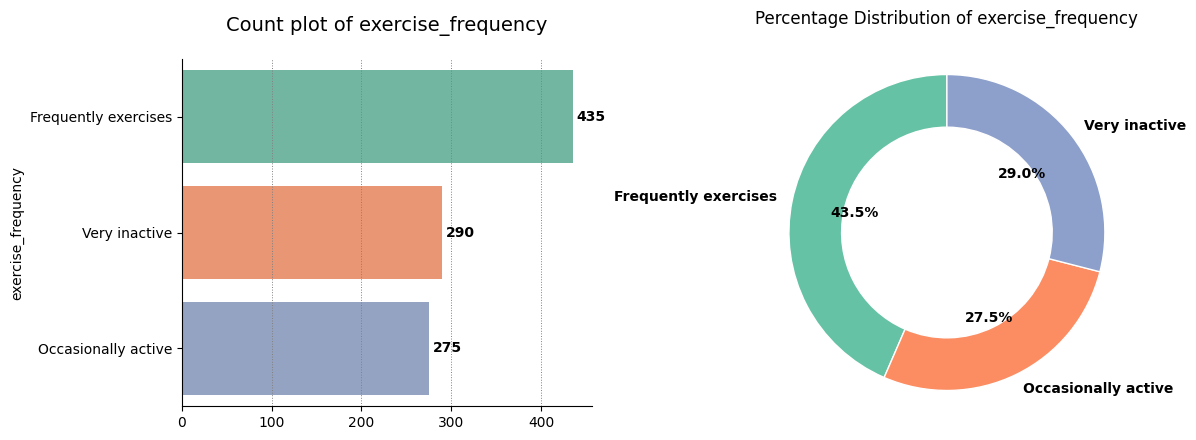

In [169]:
plot_categorical_distribution(feature="exercise_frequency")

**exercise_frequency:** <br>
- A large majority (43.5%) maintain a frequent exercise routine, which is a positive indicator of health awareness.
- However, 56.5% of students are either occasionally active or very inactive, suggesting that over half of the student population may need more encouragement to adopt regular physical activity.

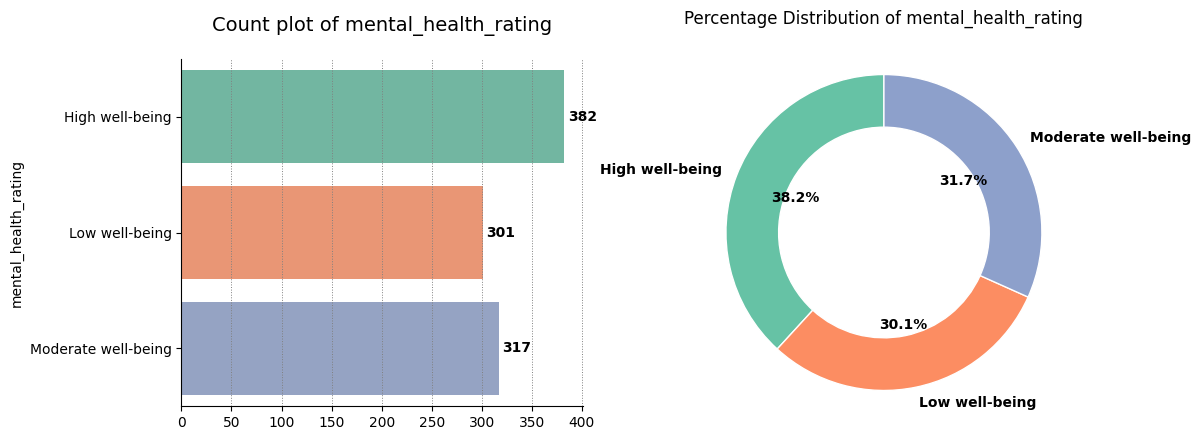

In [170]:
plot_categorical_distribution(feature="mental_health_rating")

**mental_health_rating:** <br>
- A promising 38.2% of students report high mental well-being, which is a positive sign of resilience and emotional stability.
- However, a combined 61.8% of students fall into moderate or low well-being, indicating that a majority may be experiencing stress, anxiety, or emotional fatigue.

#### Insights on Categorical Feature Distributions

- The distribution `diet_quality` highlights an opportunity to improve students diets by helping those in the Fair category move up to Good.
- The distribution `parental_education_level` suggests that most students come from households with moderate educational backgrounds (High school and Bachelor), and fewer have parents with higher academic qualifications (Master's or above).
- While the majority of the distribution `internet_quality` have acceptable to good internet, there is still a non-negligible portion of students who may face digital accessibility issues, highlighting a potential barrier to equal learning opportunities.
- This distribution `extracurricular_participation` indicates that while a significant portion of students may prioritize academics or personal time, extracurricular activities may be underutilized as a tool for soft skill development, networking, and stress relief. Schools or institutions might consider encouraging more balanced student engagement beyond just academics.
- This distribution `exercise_frequency` implies room for improvement in promoting physical health among students. Schools or institutions might consider implementing health campaigns, sports programs, or wellness initiatives to foster more balanced lifestyles.
- These results from the distribution `mental_health_rating` highlight the need for increased mental health support—such as counseling services, mindfulness programs, or academic stress relief strategies—to ensure students maintain emotional and psychological balance.

## Bivariate Analysis
### diet_quality vs. exam_score

In [171]:
# Function to create scatter plot for bivariate analysis 
def plot_scatter_with_legend(feature, order = None):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    sns.boxplot(x=feature, y="exam_score", data=df_student, hue=feature, palette="Set2", ax=ax[0])
    ax[0].set_title(f"Box plot of {feature} distribution by exam_score", pad=15)
    ax[0].set_ylabel("exam_score", labelpad=10)
    ax[0].grid(axis="y", color="gray", linestyle=":", alpha=0.7)

    sns.histplot(data=df_student, x="exam_score", hue=feature, 
                 bins=20, palette="Set2", ax=ax[1], kde=True)
    ax[1].set_title(f"Histogram of {feature} distribution by exam_score", pad=15)
    ax[1].set_xlabel("exam_score", labelpad=10)
    ax[1].set_ylabel("Frequency", labelpad=10)
    ax[1].grid(axis="y", color="gray", linestyle=":", alpha=0.7)

    plt.tight_layout()
    plt.show()

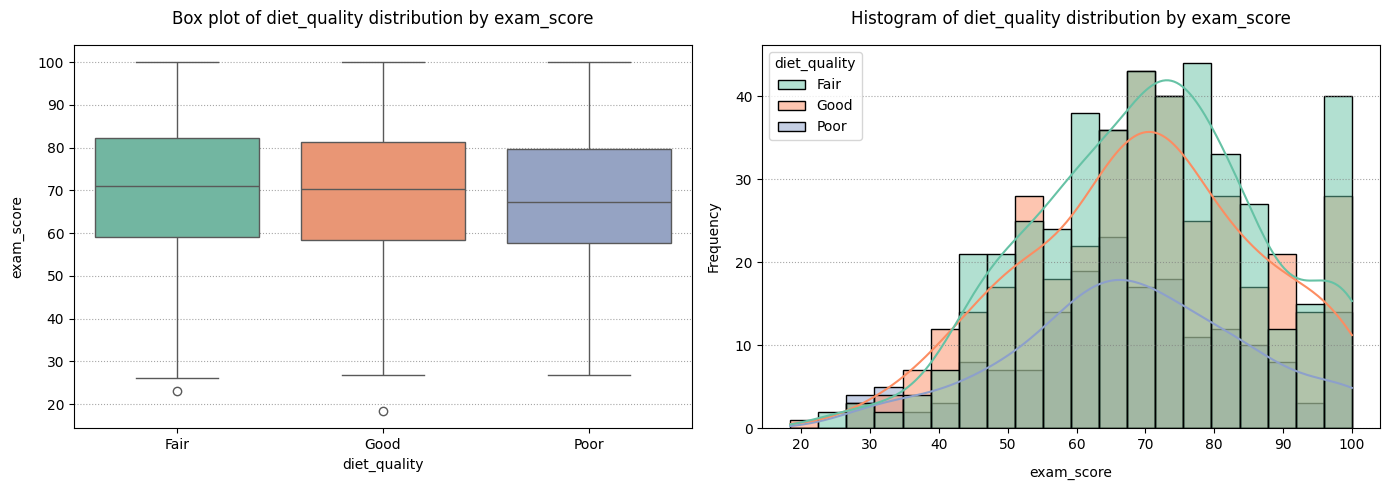

In [172]:
# Calling the function for diet_quality
plot_scatter_with_legend(feature="diet_quality")

In [173]:
cal_shapiro(cat_feature="diet_quality", num_feature="exam_score", df=df_student)
# cal_levene(dataframe=df_student_new, categorical_feature="gender", num_feature="exam_score")
perform_kruskal_test(df=df_student, categorical_feature="diet_quality", numeric_feature="exam_score")

🔎 Shapiro-Wilk Normality Test for exam_score across diet_quality groups
Group: Fair
  Shapiro-Wilk statistic: 0.985
  p-value: 0.000153
  ⚪ Fair does not appear to follow a normal distribution.

Group: Good
  Shapiro-Wilk statistic: 0.986
  p-value: 0.001165
  ⚪ Good does not appear to follow a normal distribution.

Group: Poor
  Shapiro-Wilk statistic: 0.984
  p-value: 0.033151
  ⚪ Poor does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: exam_score ~ diet_quality
Kruskal-Wallis H-statistic: 2.460
p-value: 0.29226543377608316

ℹ️ No significant difference found (p >= 0.05)


**Insight** <br>
According to the Kruskal-Wallis test and above plots, there is no significant difference in exam scores across the different diet quality groups (p ≥ 0.05). This suggests that diet quality (Fair, Good, Poor) does not have a clear impact on exam score in this dataset.

### part_time_job vs. exam_score

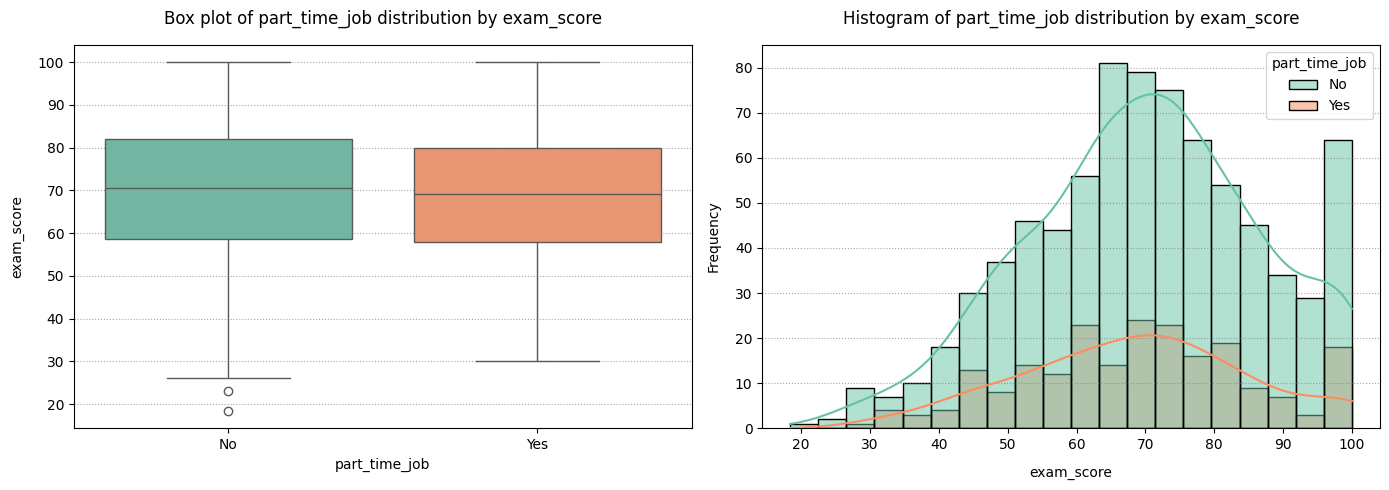

In [174]:
# Calling the function for part_time_job
plot_scatter_with_legend(feature="part_time_job")

In [175]:
cal_shapiro(cat_feature="part_time_job", num_feature="exam_score", df=df_student)
cal_mannwhitneyu(dataframe=df_student, categorical_feature="part_time_job", num_feature="exam_score")

🔎 Shapiro-Wilk Normality Test for exam_score across part_time_job groups
Group: No
  Shapiro-Wilk statistic: 0.986
  p-value: 0.000001
  ⚪ No does not appear to follow a normal distribution.

Group: Yes
  Shapiro-Wilk statistic: 0.985
  p-value: 0.019337
  ⚪ Yes does not appear to follow a normal distribution.

🔍 Mann-Whitney U test: exam_score ~ part_time_job
Mann-Whitney U statistic: 87986.500
p-value: 0.33750514845947854
⚪ There is no significant difference between the two groups.


**Insight** <br>
The distribution of scores between groups is not significantly different. And based on the results from the Mann-Whitney U test, it can be shown that part time did not have a clear effect on the exam score in the dataset.

### parental_education_level vs. exam_score

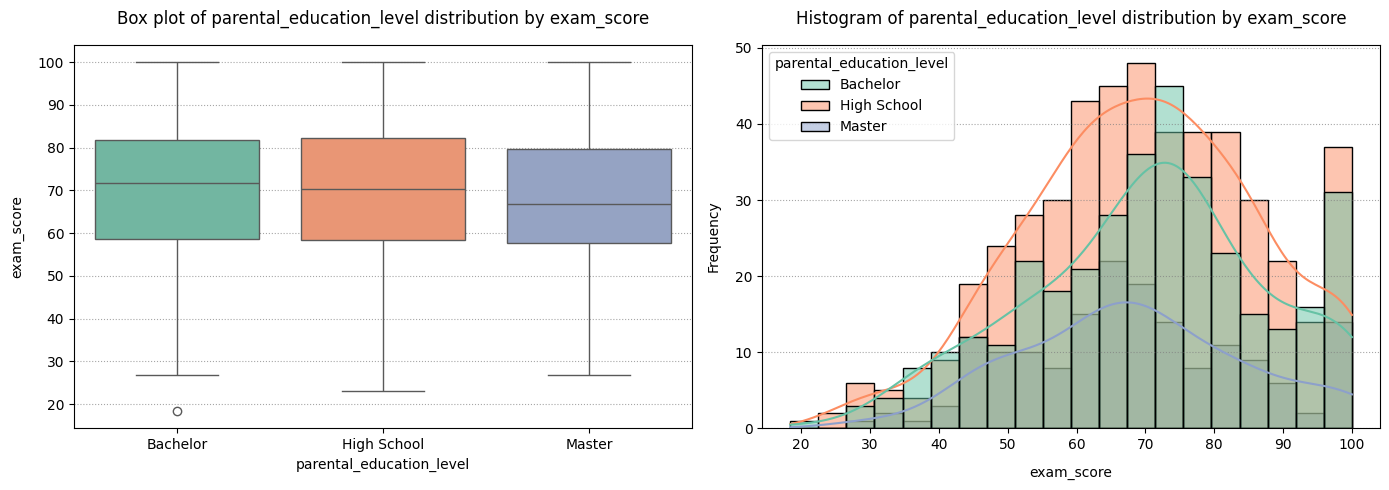

In [176]:
# Calling the function for parental_education_level
plot_scatter_with_legend(feature="parental_education_level")

In [177]:
cal_shapiro(cat_feature="parental_education_level", num_feature="exam_score", df=df_student)
perform_kruskal_test(df=df_student, categorical_feature="parental_education_level", numeric_feature="exam_score")

🔎 Shapiro-Wilk Normality Test for exam_score across parental_education_level groups
Group: Master
  Shapiro-Wilk statistic: 0.985
  p-value: 0.061834
  🟢 Master appears to follow a normal distribution.

Group: High School
  Shapiro-Wilk statistic: 0.987
  p-value: 0.000290
  ⚪ High School does not appear to follow a normal distribution.

Group: Bachelor
  Shapiro-Wilk statistic: 0.981
  p-value: 0.000138
  ⚪ Bachelor does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: exam_score ~ parental_education_level
Kruskal-Wallis H-statistic: 3.017
p-value: 0.22125746930672996

ℹ️ No significant difference found (p >= 0.05)


**Insight** <br>
The distribution of scores between groups is not significantly different. And based on the results from the Kruskal-Wallis test, it can be seen that parental education level has no clear impact on exam score in the dataset.

### internet_quality vs. exam_score

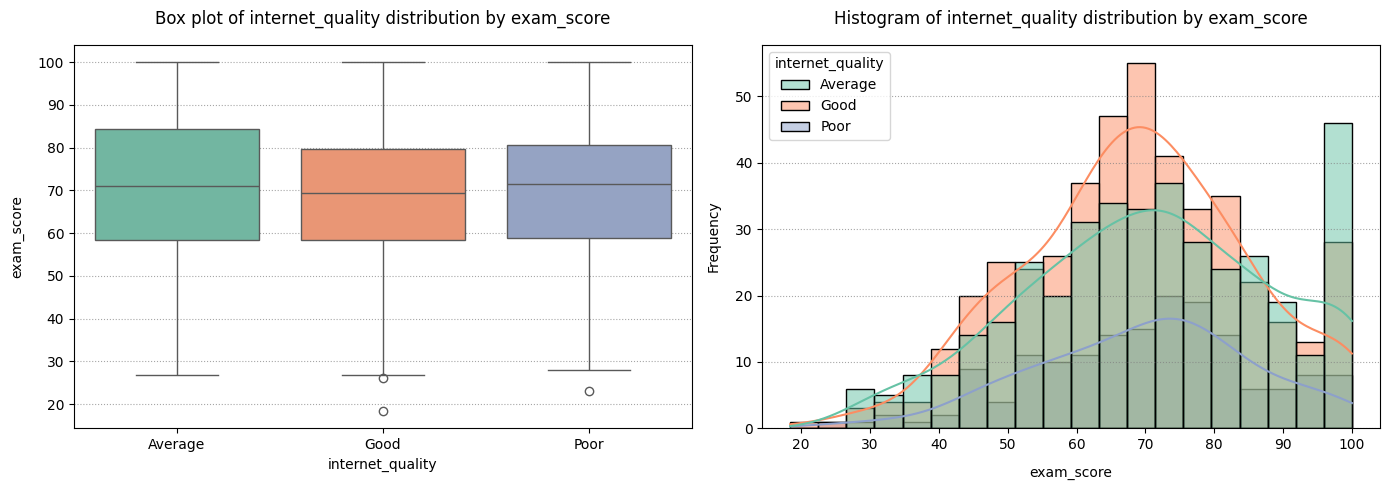

In [178]:
# Calling the function for internet_quality
plot_scatter_with_legend(feature="internet_quality")

In [179]:
cal_shapiro(cat_feature="internet_quality", num_feature="exam_score", df=df_student)
perform_kruskal_test(df=df_student, categorical_feature="internet_quality", numeric_feature="exam_score")

🔎 Shapiro-Wilk Normality Test for exam_score across internet_quality groups
Group: Average
  Shapiro-Wilk statistic: 0.977
  p-value: 0.000007
  ⚪ Average does not appear to follow a normal distribution.

Group: Poor
  Shapiro-Wilk statistic: 0.987
  p-value: 0.154800
  🟢 Poor appears to follow a normal distribution.

Group: Good
  Shapiro-Wilk statistic: 0.991
  p-value: 0.005760
  ⚪ Good does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: exam_score ~ internet_quality
Kruskal-Wallis H-statistic: 3.221
p-value: 0.19975799442666467

ℹ️ No significant difference found (p >= 0.05)


**Insight** <br>
The distribution of scores between groups is not significantly different. And based on the results from the Kruskal-Wallis test, it can be seen that the internet quality has no clear impact on exam score in the dataset.

### extracurricular_participation vs. exam_score

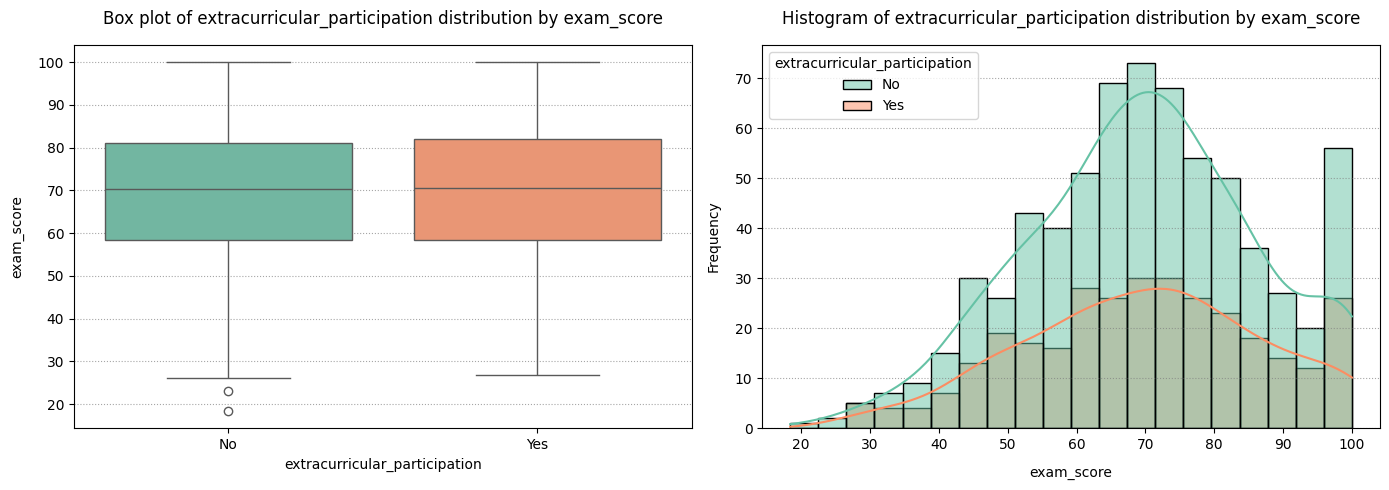

In [180]:
# Calling the function for extracurricular_participation
plot_scatter_with_legend(feature="extracurricular_participation")

In [181]:
cal_shapiro(cat_feature="extracurricular_participation", num_feature="exam_score", df=df_student)
cal_mannwhitneyu(dataframe=df_student, categorical_feature="extracurricular_participation", num_feature="exam_score")

🔎 Shapiro-Wilk Normality Test for exam_score across extracurricular_participation groups
Group: Yes
  Shapiro-Wilk statistic: 0.984
  p-value: 0.001245
  ⚪ Yes does not appear to follow a normal distribution.

Group: No
  Shapiro-Wilk statistic: 0.987
  p-value: 0.000014
  ⚪ No does not appear to follow a normal distribution.

🔍 Mann-Whitney U test: exam_score ~ extracurricular_participation
Mann-Whitney U statistic: 108855.000
p-value: 0.9219891594953306
⚪ There is no significant difference between the two groups.


**Insight** <br>
The distribution of scores between groups is not significantly different. And based on the results from the Mann-Whitney U test, it can be seen that the extracurricular participation has no clear impact on exam score in the dataset.

### exercise_frequency vs. exam_score

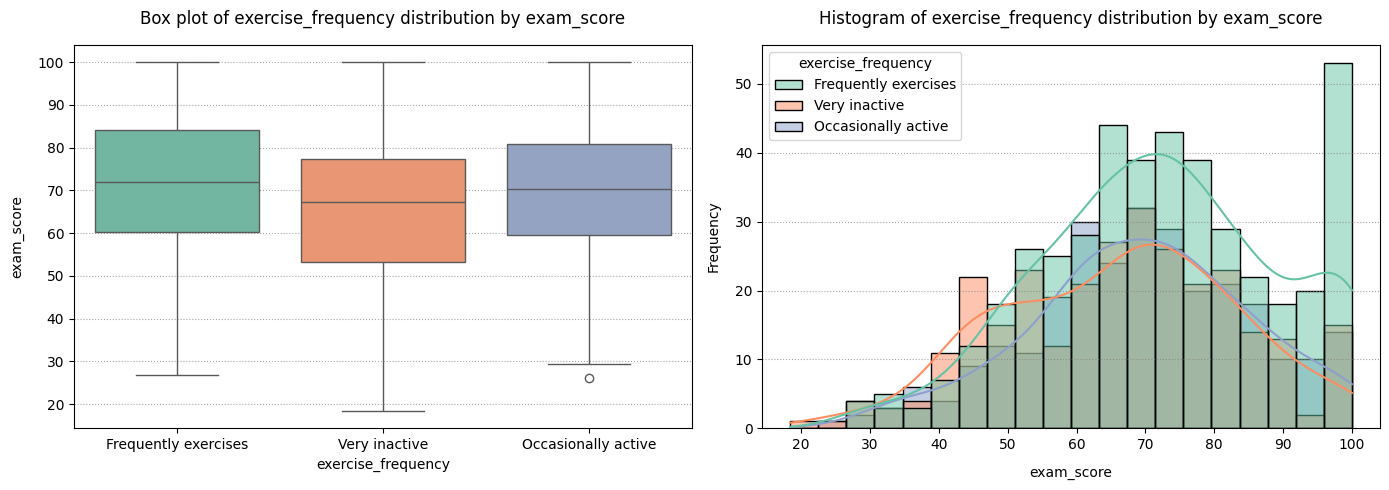

In [182]:
# Calling the function for exercise_frequency
plot_scatter_with_legend(feature="exercise_frequency")

In [183]:
cal_shapiro(cat_feature="exercise_frequency", num_feature="exam_score", df=df_student)
perform_kruskal_test(df=df_student, categorical_feature="exercise_frequency", numeric_feature="exam_score")

🔎 Shapiro-Wilk Normality Test for exam_score across exercise_frequency groups
Group: Frequently exercises
  Shapiro-Wilk statistic: 0.977
  p-value: 0.000003
  ⚪ Frequently exercises does not appear to follow a normal distribution.

Group: Very inactive
  Shapiro-Wilk statistic: 0.989
  p-value: 0.026371
  ⚪ Very inactive does not appear to follow a normal distribution.

Group: Occasionally active
  Shapiro-Wilk statistic: 0.989
  p-value: 0.030053
  ⚪ Occasionally active does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: exam_score ~ exercise_frequency
Kruskal-Wallis H-statistic: 19.462
p-value: 5.940382430545654e-05
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                      Frequently exercises  Occasionally active  Very inactive
Frequently exercises              1.000000             0.123423       0.000033
Occasionally active               0.123423             1.000000       0.109153
Very inactive                     0.000033        

**Insight** <br>
- Kruskal-Wallis: p = 0.000059 → there is a significant difference among the groups.
- Dunn’s Test:
    - Frequent vs Inactive: p = 0.000033 → highly significant difference.
    - Frequent vs Occasional: p = 0.123 → not statistically significant.
    - Occasional vs Inactive: p = 0.109 → not statistically significant.

**Summary:** Only the frequent exercisers differ significantly from the inactive group.

***Results indicate that students who exercise frequently score significantly higher on exams compared to those who rarely exercise (p < 0.005). This is supported by both the boxplot and histogram, which show a higher and more diverse score distribution among frequent exercisers. Differences between the occasional group and the other two were not statistically significant.***

### mental_health_rating vs. exam_score

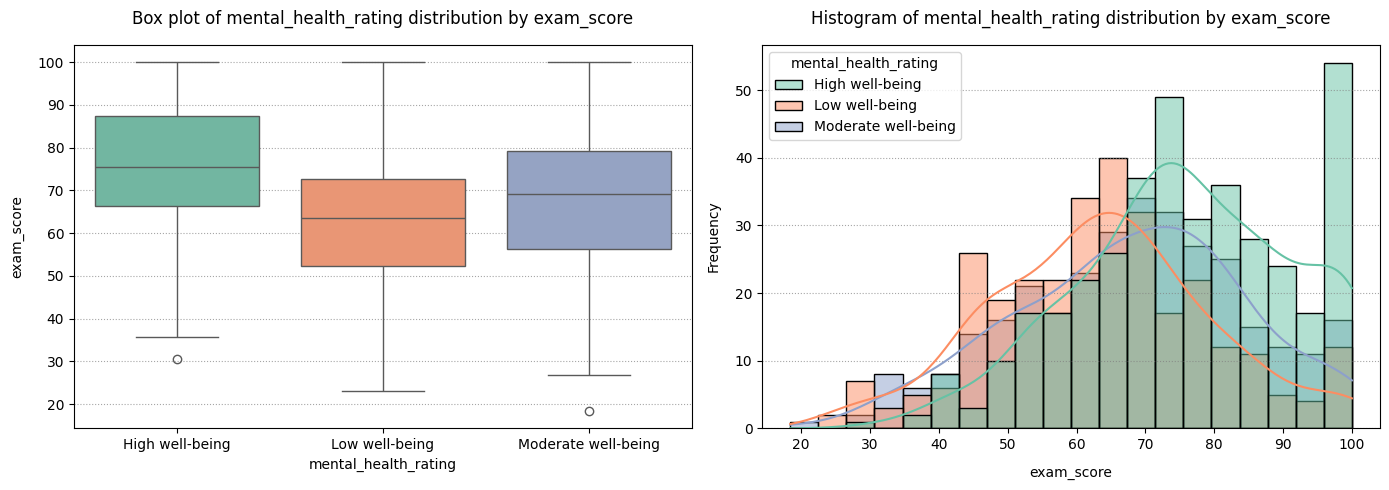

In [184]:
# Calling the function for mental_health_rating
plot_scatter_with_legend(feature="mental_health_rating")

In [185]:
cal_shapiro(cat_feature="mental_health_rating", num_feature="exam_score", df=df_student)
perform_kruskal_test(df=df_student, categorical_feature="mental_health_rating", numeric_feature="exam_score")

🔎 Shapiro-Wilk Normality Test for exam_score across mental_health_rating groups
Group: High well-being
  Shapiro-Wilk statistic: 0.974
  p-value: 0.000002
  ⚪ High well-being does not appear to follow a normal distribution.

Group: Low well-being
  Shapiro-Wilk statistic: 0.992
  p-value: 0.084772
  🟢 Low well-being appears to follow a normal distribution.

Group: Moderate well-being
  Shapiro-Wilk statistic: 0.988
  p-value: 0.010485
  ⚪ Moderate well-being does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: exam_score ~ mental_health_rating
Kruskal-Wallis H-statistic: 97.887
p-value: 5.548457299860214e-22
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                     High well-being  Low well-being  Moderate well-being
High well-being         1.000000e+00    8.125327e-22         4.772128e-09
Low well-being          8.125327e-22    1.000000e+00         9.452196e-04
Moderate well-being     4.772128e-09    9.452196e-04         1.000000e+00


**Insight** <br>
- Kruskal-Wallis: - p ≈ 5.5e-22 → very significant difference across groups
- Dunn's Post-Hoc Test:

| Group Comparison            | p-value  | Interpretation                   |
| --------------------------- | -------- | -------------------------------- |
| High vs Low well-being      | 8.13e-22 | Highly statistically significant | 
| High vs Moderate well-being | 4.77e-09 | Strongly significant             | 
| Moderate vs Low well-being  | 9.45e-04 | Statistically significant        | 

**Summary:** All group differences are statistically significant, and exam scores increase as mental well-being improves.


***The results indicate a significant impact of mental well-being on academic performance. Students with better mental health tend to score higher, with statistically significant differences across all three well-being levels (p < 0.005). The statistical tests and visualizations reinforce one another, highlighting the positive influence of mental health on exam score.***

**Insights Summary:** <br>
***There is no significant difference between the scores of gender, part_time_job, diet_quality, parental_education_level, internet_quality and extracurricular_participation. Except for exercise_frequency and mental_health_rating, we also identified specific effects on exam scores through statistical testing.***

## Multivariate Analysis
### Social Media & Netflix vs Exam Score

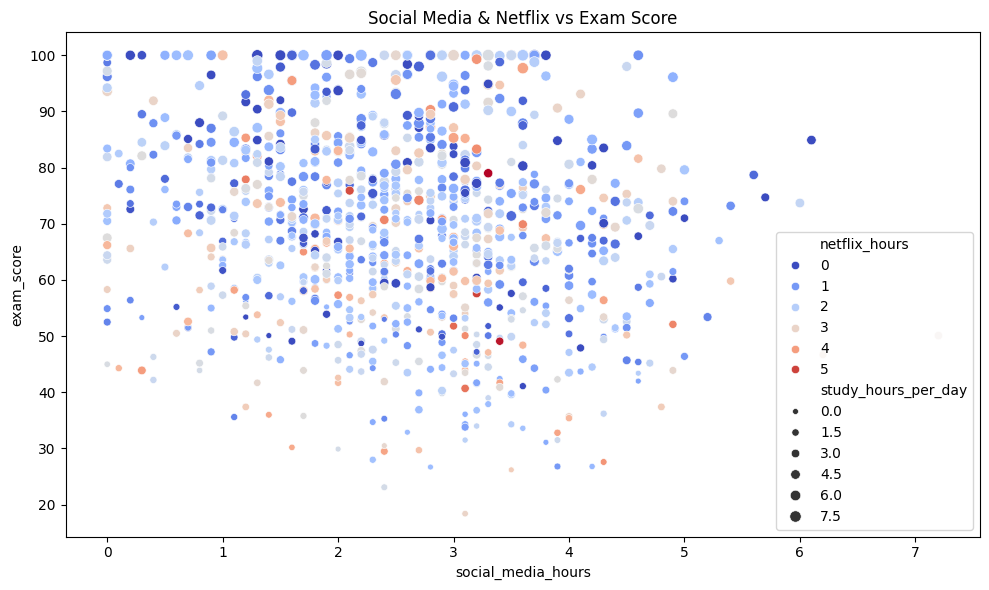

In [186]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_student,
    x="social_media_hours",
    y="exam_score",
    hue="netflix_hours",
    size="study_hours_per_day",
    palette="coolwarm"
)
plt.title("Social Media & Netflix vs Exam Score")
plt.tight_layout()
plt.show()


**Insight** <br>
- The more time spent on social media, the lower the exam score tends to be, especially when usage exceeds 3–4 hours per day.
- Netflix viewing also shows a downward trend
- Students who limit their time on social media and Netflix while dedicating more time to studying tend to achieve the highest exam scores (above 80–90).

***This chart provides a visual representation of the relationship between factors that influence students' test scores. It shows that using social media and watching more Netflix can negatively impact scores, while studying more has a positive impact.***

### Study Hours and Part-Time Job vs Exam Score

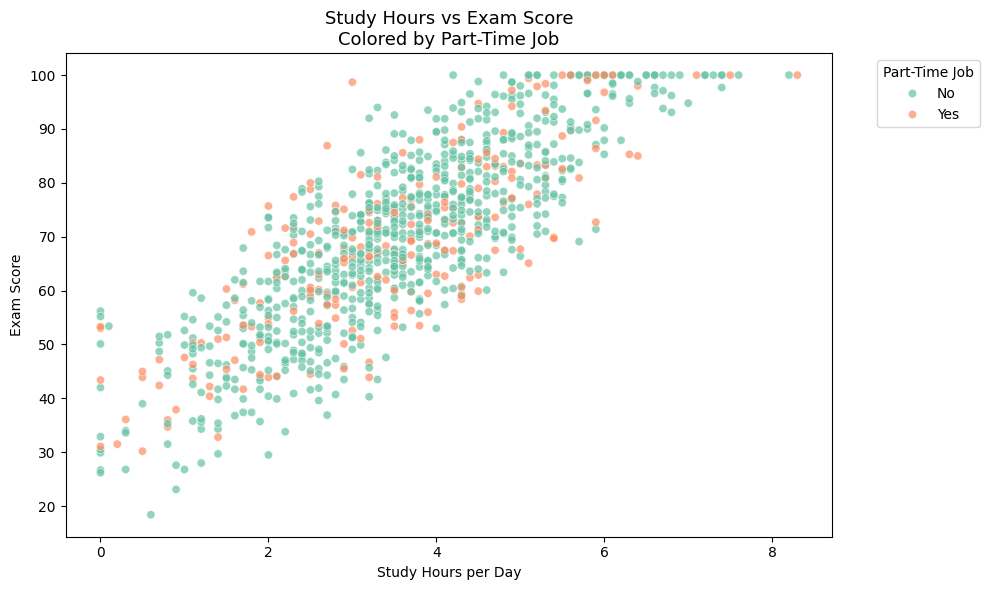

In [187]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_student,
    x="study_hours_per_day",
    y="exam_score",
    hue="part_time_job",
    palette="Set2",
    alpha=0.7
)

plt.title("Study Hours vs Exam Score\nColored by Part-Time Job", fontsize=13)
plt.xlabel("Study Hours per Day")
plt.ylabel("Exam Score")
plt.legend(title="Part-Time Job", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


**Insight** <br>
- Clear positive trend: In general, students who study more hours per day tend to score higher on exams. There is a steady upward trend, showing a strong positive correlation between study time and performance.
- Each dot represents a student, with **green** indicating students without a part-time job and **orange** for students with a part-time job. Both groups display a similar trend, suggesting that having a part-time job doesn't significantly affect scores, as long as study time is maintained.
- There appear to be few students who study less than 2 hours a day, and scores below 50 are rare.

***In summary, the chart sends a familiar but powerful message: studying more yields better results, and part-time work doesn't necessarily hurt performance if students can manage their time effectively***

### Exam Score by Diet Quality and Exercise Frequency

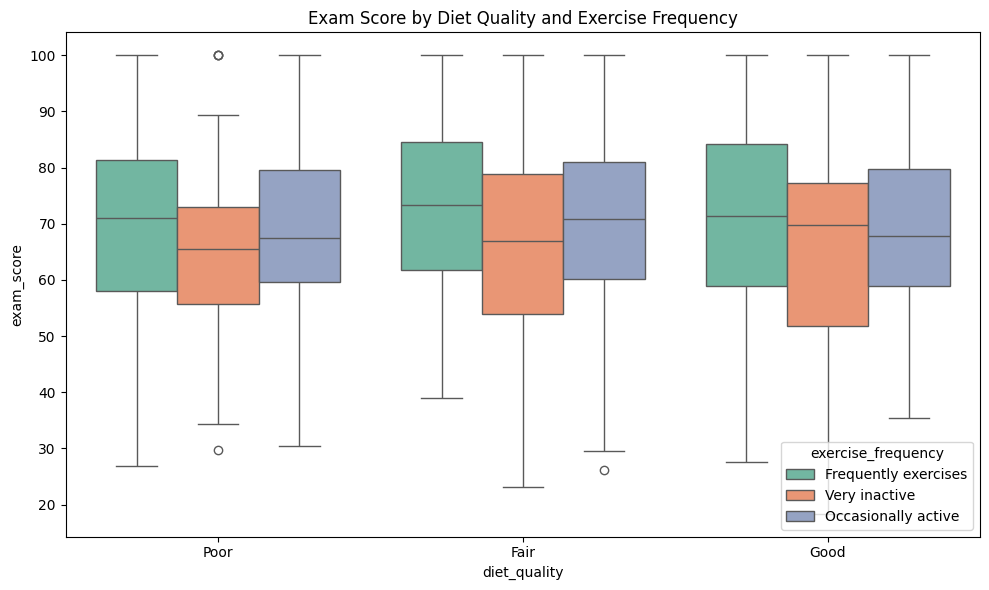

In [188]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_student,
    x="diet_quality",
    y="exam_score",
    hue="exercise_frequency",
    palette="Set2",
    order=["Poor", "Fair", "Good"]
)
plt.title("Exam Score by Diet Quality and Exercise Frequency")
plt.tight_layout()
plt.show()

**Insight** <br>
- The combination of good diet quality and frequent exercise leads to the highest exam scores.
- Poor diet quality and inactivity result in the lowest scores.

***The box plot highlights the significant impact of diet quality and exercise frequency on exam scores. Students with a good diet and who exercise frequently consistently achieve higher scores, while those with a poor diet and who are inactive tend to perform worse. This underscores the importance of maintaining a healthy lifestyle for academic success.***

### Exam Score by Exercise Frequency and Mental Health Rating

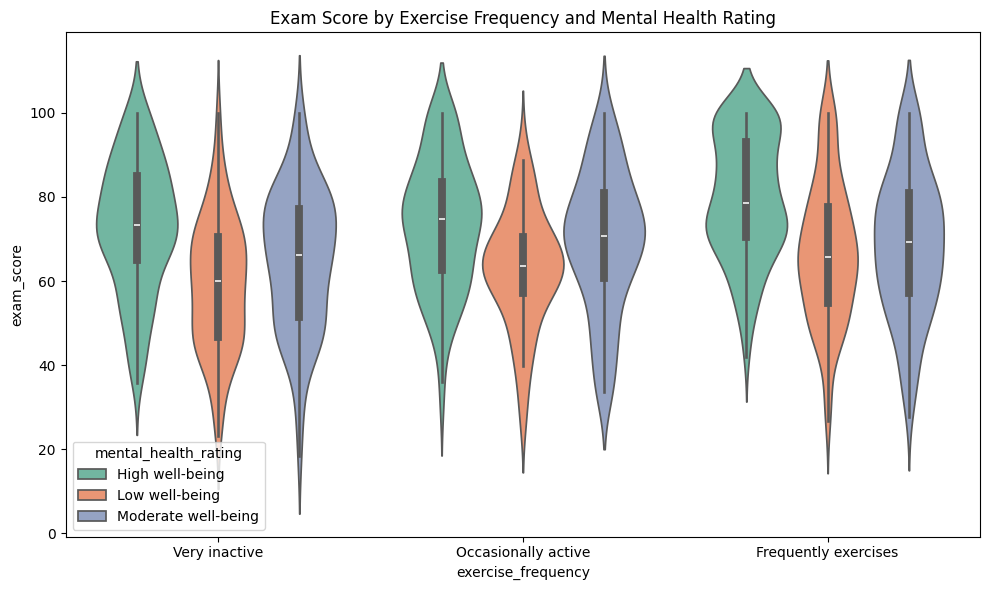

In [189]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_student,
    x="exercise_frequency",
    y="exam_score",
    hue="mental_health_rating",
    palette="Set2",
    order=["Very inactive", "Occasionally active", "Frequently exercises"]
);
plt.title("Exam Score by Exercise Frequency and Mental Health Rating")
plt.tight_layout()
plt.show()

**Insight** <br>
- The combination of frequent exercise and high well-being leads to the highest exam scores.
- The very inactive group with low well-being has some of the lowest exam results, often below 60.
- In several cases, students with moderate mental health still perform well academically if they maintain regular physical activity—suggesting **exercise can partially compensate for less-than-optimal mental states**.

***The box plot highlights the significant impact of exercise frequency and mental health rating on exam scores. Students who exercise frequently and have high well-being consistently achieve higher scores, while those who are very inactive and have low well-being tend to perform worse. This underscores the importance of maintaining both physical and mental health for academic success.***

### Exam Score by Sleep hours and Mental Health Rating

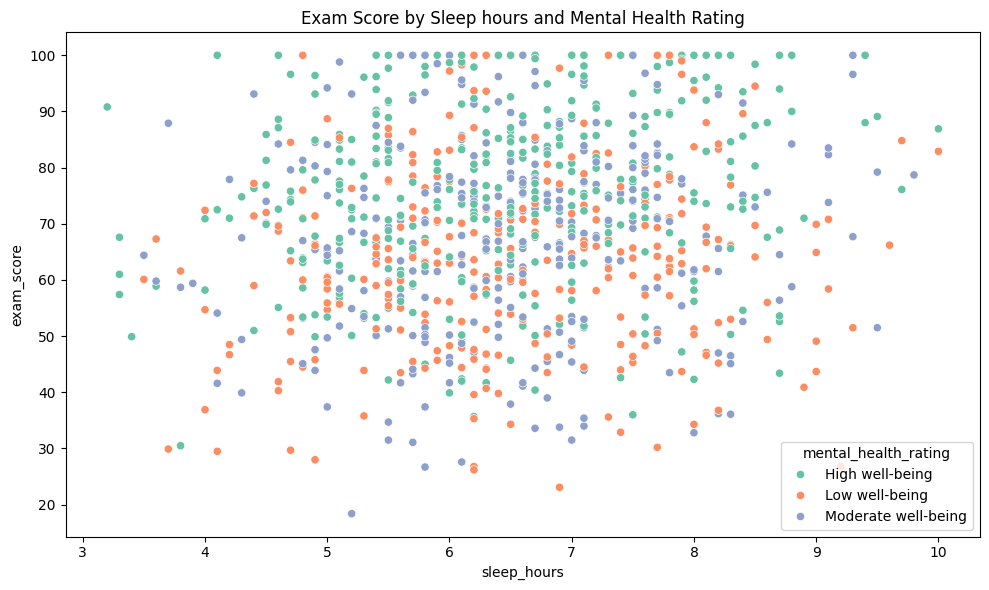

In [190]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_student,
    x='sleep_hours',
    y='exam_score',
    hue='mental_health_rating',
    palette='Set2'
)
plt.title("Exam Score by Sleep hours and Mental Health Rating")
plt.tight_layout()
plt.show()


**Insight** <br>
- The data points are scattered randomly, showing no strong correlation between sleep duration and exam performance. Some students who sleep only 4–5 hours still achieve high scores, and vice versa.
- Points of all colors are spread across a wide range of scores and sleep durations, suggesting that mental well-being alone doesn’t account for academic performance differences.

***This one suggests that the relationship between sleep, mental health, and academic success is not linear. While getting enough sleep or having good mental health helps, they don’t guarantee high scores.***

### Exam Score by Study hours per day and Mental Health Rating

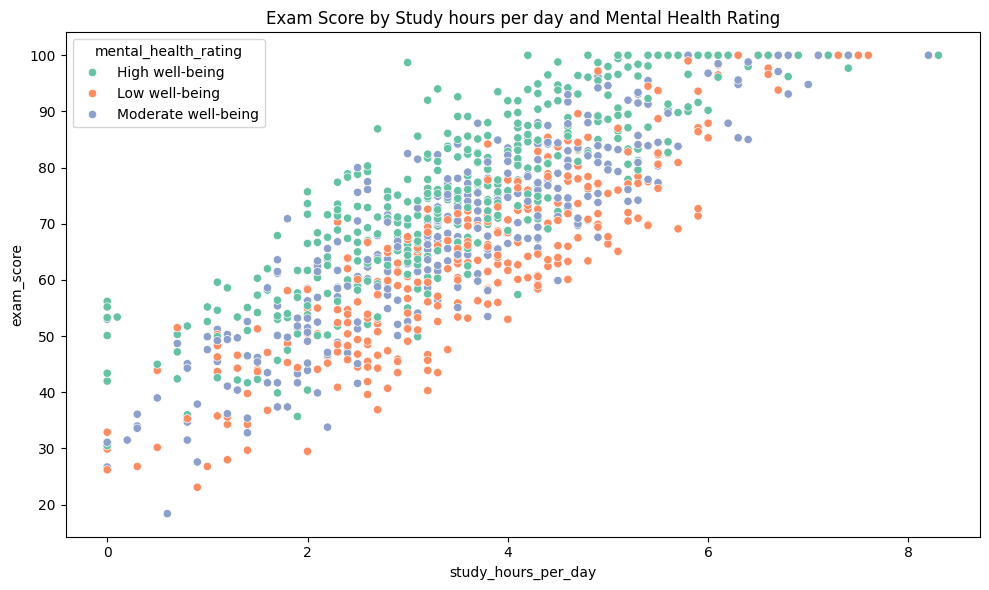

In [191]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_student,
    x="study_hours_per_day",
    y="exam_score",
    hue="mental_health_rating",
    palette="Set2"
);
plt.title("Exam Score by Study hours per day and Mental Health Rating")
plt.tight_layout()
plt.show()

**Insight** <br>
- Among students who study for 6–10 hours a day, even those with low well-being can still achieve strong scores. This suggests that focused effort may help counterbalance the effects of poor mental health.
- Students with low well-being and minimal study time generally perform worse—showing that a combination of poor mental health and lack of investment in study time can be detrimental.

***This chart presents a realistic yet encouraging message: daily study time plays a crucial role in academic performance, and in many cases, it can compensate for less-than-ideal mental health. Still, to achieve consistent success, attention to both psychological well-being and effective study routines is essential.***

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


In [ ]:
# df_student.reset_index(drop=True, inplace=True) # reset index
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_student, df_student["exam_score_cat"]):
    strat_train_set = df_student.loc[train_index]
    strat_test_set = df_student.loc[test_index]

In [199]:
df_student_new = strat_train_set.drop(columns="exam_score", axis=1)
df_student_new_labels = strat_train_set["exam_score"].copy()

In [194]:
# Now, we need to remove feature "exam_score_cat"
for set_ in (strat_train_set, strat_test_set):
    set_.drop("exam_score_cat", axis=1, inplace=True)

In [197]:
num_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

In [204]:
num_feature = ["age",  "study_hours_per_day",  "social_media_hours",  "netflix_hours",  "attendance_percentage",  "sleep_hours"]

In [206]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_feature),
        ("cat", cat_transformer, cat_features),
    ]
)
preprocessor.fit(df_student_new)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'study_hours_per_day',
                                  'social_media_hours', 'netflix_hours',
                                  'attendance_percentage', 'sleep_hours']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'part_time_job', 'diet_quality',
                                  'parental_education_level',
                                  'internet_quality',
                                  'extracurricular_participation',
                                  'exercise_frequency',
                                  'mental_health_rating'])])

In [207]:
df_student_new_prepared = preprocessor.transform(df_student_new)

In [208]:
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num__age',
 'num__study_hours_per_day',
 'num__social_media_hours',
 'num__netflix_hours',
 'num__attendance_percentage',
 'num__sleep_hours',
 'cat__gender_Female',
 'cat__gender_Male',
 'cat__gender_Other',
 'cat__part_time_job_No',
 'cat__part_time_job_Yes',
 'cat__diet_quality_Fair',
 'cat__diet_quality_Good',
 'cat__diet_quality_Poor',
 'cat__parental_education_level_Bachelor',
 'cat__parental_education_level_High School',
 'cat__parental_education_level_Master',
 'cat__internet_quality_Average',
 'cat__internet_quality_Good',
 'cat__internet_quality_Poor',
 'cat__extracurricular_participation_No',
 'cat__extracurricular_participation_Yes',
 'cat__exercise_frequency_Frequently exercises',
 'cat__exercise_frequency_Occasionally active',
 'cat__exercise_frequency_Very inactive',
 'cat__mental_health_rating_High well-being',
 'cat__mental_health_rating_Low well-being',
 'cat__mental_health_rating_Moderate well-being']

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>


### **Root Mean Squared Error (RMSE)**

✅ Definition:

**RMSE (Root Mean Squared Error)** is a metric used to measure the average deviation between a model’s predicted values and the actual values. The lower the RMSE, the better the model's predictions.

🧮 Formula:

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

* $y_i$: Actual value
* $\hat{y}_i$: Predicted value
* $n$: Number of observations

📌 Characteristics:

* RMSE is **always non-negative** (≥ 0).
* The closer RMSE is to **0**, the better the model.
* RMSE is **sensitive to outliers** due to squaring the errors.

**References:**

* [Kaggle Evaluation Page](https://www.kaggle.com/discussions/general/215997)

### **R-squared (R²) – Coefficient of Determination**

✅ Definition:

**R-squared (R²)** is a metric that evaluates how well a regression model fits the data. It measures the **proportion of variance** in the dependent variable that is explained by the independent variables in the model.

🧮 Formula:

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

* $SS_{res}$: Residual Sum of Squares
* $SS_{tot}$: Total Sum of Squares

📌 Interpretation:

* $R^2 \in [0, 1]$
* R² = 0 → The model explains none of the variability
* R² = 1 → The model explains all of the variability
* The closer R² is to **1**, the better the model fits the data

Intuition:

| R² Value | Interpretation                             |
| -------- | ------------------------------------------ |
| ≈ 0      | Very poor model fit                        |
| ≈ 0.5    | Explains around 50% of the variance        |
| ≈ 0.8+   | Very good model fit (depending on context) |

**References:**
* [Evaluation Page](https://www.scribbr.com/statistics/coefficient-of-determination)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Evaluation Using Cross-Validation</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Evaluation Using Cross-Validation
    </h1>
</div>


In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

seed = 42
max_iter = 10000
models = [
    LinearRegression(),
    Lasso(alpha=1.0, max_iter=max_iter, random_state=seed),
    Ridge(alpha=0.1, max_iter=max_iter, random_state=seed),
    ElasticNet(alpha=0.1, max_iter=max_iter, random_state=seed),
    DecisionTreeRegressor(max_depth=5, random_state=seed),
    RandomForestRegressor(n_estimators=100, random_state=seed),
    GradientBoostingRegressor(random_state=seed),
    AdaBoostRegressor(random_state=seed),
    ExtraTreesRegressor(random_state=seed),
    SVR(kernel="rbf", max_iter=max_iter),
    LinearSVR(max_iter=max_iter, random_state=seed),
    MLPRegressor(max_iter=max_iter, random_state=seed),
    KNeighborsRegressor(n_neighbors=5),
    XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=seed)
]

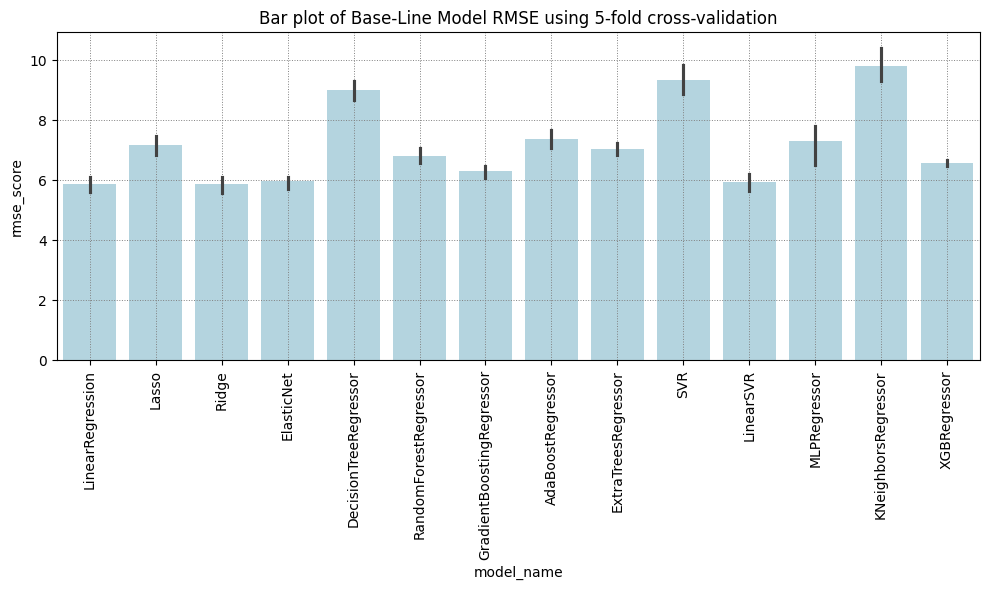

,Mean,Standard Deviation
model_name,,
Ridge,5.868019,0.324083
LinearRegression,5.869545,0.320342
LinearSVR,5.936362,0.358769
ElasticNet,5.962928,0.266597
GradientBoostingRegressor,6.307625,0.257405
XGBRegressor,6.585160,0.114919
RandomForestRegressor,6.820855,0.325868
ExtraTreesRegressor,7.043497,0.283440
Lasso,7.184854,0.430624


In [225]:
def generate_baseline_results_RMSE(models, X, y, metrics, cv = 5, plot_results = False):
    # define K -Fold
    kfold = KFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        rmse_scores = np.sqrt(-scores)
        for fold_idx, rmse_score in enumerate(rmse_scores):
            entries.append((model_name, fold_idx, rmse_score))
    cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "rmse_score"])

    if plot_results:
        plt.figure(figsize=(10, 6))
        sns.barplot(x = "model_name", y = "rmse_score", data = cv_df, color="lightblue")
        plt.title("Bar plot of Base-Line Model RMSE using 5-fold cross-validation")
        plt.grid(color="gray", linestyle=":", linewidth=0.7)
        plt.xticks(rotation = 90)
        plt.tight_layout()
        plt.show()
    else:
        pass

    # Summary
    mean_rmse_score = cv_df.groupby("model_name")["rmse_score"].mean()
    std_rmse_score = cv_df.groupby("model_name")["rmse_score"].std()

    baseline_result = pd.concat([mean_rmse_score, std_rmse_score], axis=1, ignore_index=True)
    baseline_result.columns = ["Mean", "Standard Deviation"]

    # Sort by accuracy
    baseline_result.sort_values(by=["Mean"], ascending=True, inplace=True)
    return baseline_result

generate_baseline_results_RMSE(models = models, X = df_student_new_prepared,
                          y = df_student_new_labels, metrics = "neg_mean_squared_error", plot_results = True)

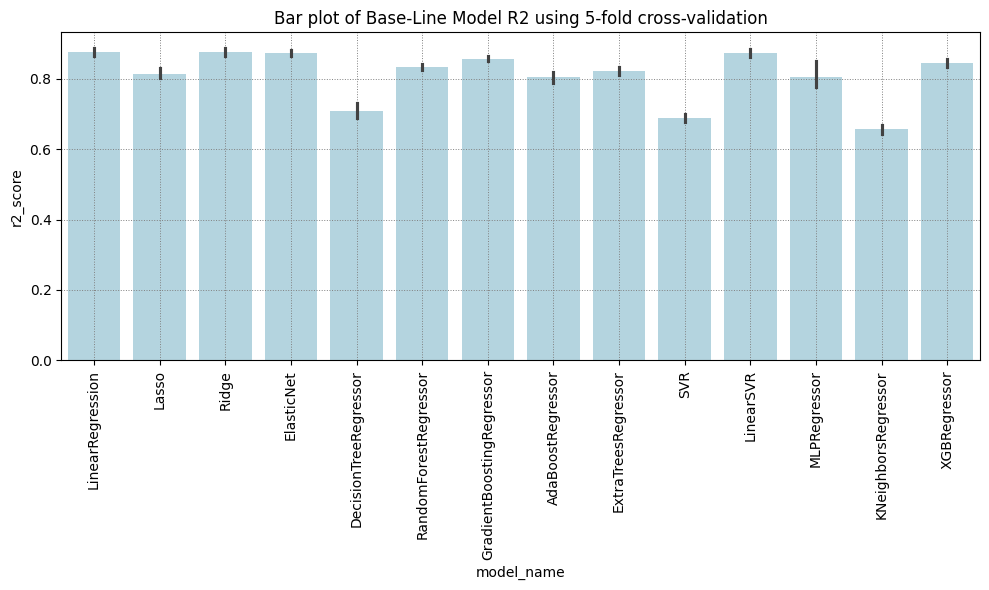

,Mean,Standard Deviation
model_name,,
Ridge,0.876297,0.015405
LinearRegression,0.876261,0.014959
LinearSVR,0.873445,0.015986
ElasticNet,0.872584,0.010482
GradientBoostingRegressor,0.857511,0.009638
XGBRegressor,0.844136,0.015774
RandomForestRegressor,0.833501,0.010242
ExtraTreesRegressor,0.822098,0.015468
Lasso,0.814991,0.018405


In [226]:
def generate_baseline_results_R2(models, X, y, metrics, cv = 5, plot_results = False):
    # define K -Fold
    kfold = KFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, r2_score in enumerate(scores):
            entries.append((model_name, fold_idx, r2_score))
    cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "r2_score"])

    if plot_results:
        plt.figure(figsize=(10, 6))
        sns.barplot(x = "model_name", y = "r2_score", data = cv_df, color="lightblue")
        plt.title("Bar plot of Base-Line Model R2 using 5-fold cross-validation")
        plt.grid(color="gray", linestyle=":", linewidth=0.7)
        plt.xticks(rotation = 90)
        plt.tight_layout()
        plt.show()
    else:
        pass

    # Summary
    mean_r2_score = cv_df.groupby("model_name")["r2_score"].mean()
    std_r2_score = cv_df.groupby("model_name")["r2_score"].std()

    baseline_result = pd.concat([mean_r2_score, std_r2_score], axis=1, ignore_index=True)
    baseline_result.columns = ["Mean", "Standard Deviation"]

    # Sort by accuracy
    baseline_result.sort_values(by=["Mean"], ascending=False, inplace=True)
    return baseline_result

generate_baseline_results_R2(models = models, X = df_student_new_prepared,
                          y = df_student_new_labels, metrics = "r2", plot_results = True)

**Insight:**
- Clearly, Ridge, LinearRegression, LinearSVR and ElasticNet models all have the best RMSE and R2.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Model Performance Summary</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Model Performance Summary
    </h1>
</div>


In [258]:
best_models = {
    "Ridge": Ridge(alpha=0.1, max_iter=max_iter, random_state=seed),
    "LinearRegression": LinearRegression(),
    "LinearSVR": LinearSVR(max_iter=max_iter, random_state=seed),
    "ElasticNet": ElasticNet(alpha=0.1, max_iter=max_iter, random_state=seed)
}

In [283]:
# Function to evaluate regression models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics for regression
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")
    print("-"*80)

    print(f"Feature Coef...")
    feature_coef_df = pd.DataFrame({"Feature": list_feature_prepared, "Coefficient": model.coef_})
    feature_coef_sorted_df = feature_coef_df.sort_values(by = "Coefficient", ascending=False)
    print(feature_coef_sorted_df.head())

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_coef_sorted_df,  x="Coefficient", y="Feature", color="blue")
    plt.grid(color="gray", linestyle=":", linewidth=0.7)
    plt.title("Feature Coefficients")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.axvline(x=0, color="black", linewidth=0.8)
    plt.tight_layout()
    plt.show()

Evaluating Ridge...
Model: Ridge
Root Mean Squared Error (RMSE): 5.4716
R-squared (R2): 0.8989
--------------------------------------------------------------------------------
Feature Coef...
                                         Feature  Coefficient
1                       num__study_hours_per_day    13.925576
25     cat__mental_health_rating_High well-being     6.527505
22  cat__exercise_frequency_Frequently exercises     3.216998
5                               num__sleep_hours     2.553148
4                     num__attendance_percentage     1.481860


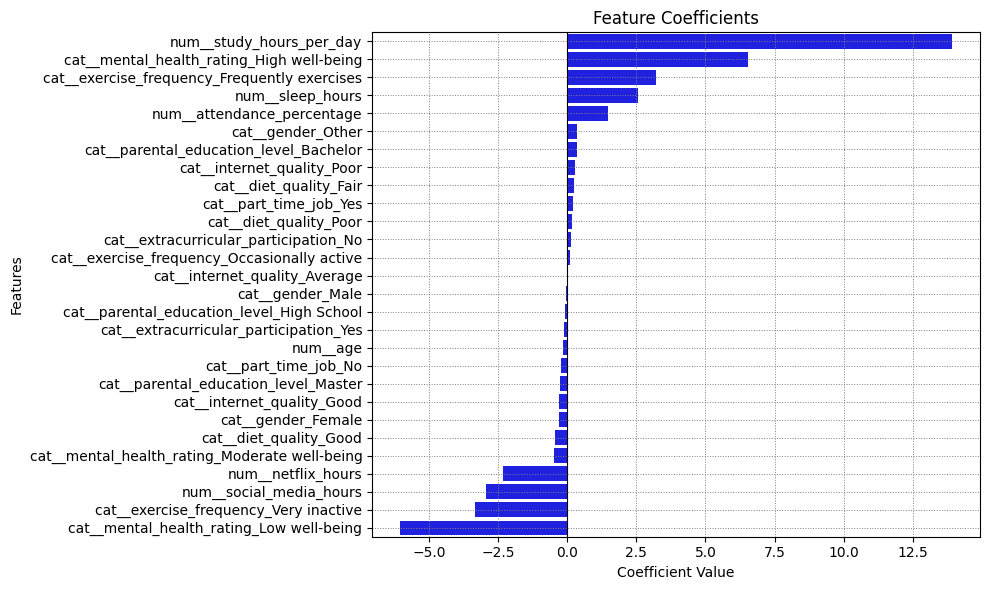


Evaluating LinearRegression...
Model: LinearRegression
Root Mean Squared Error (RMSE): 5.4713
R-squared (R2): 0.8989
--------------------------------------------------------------------------------
Feature Coef...
                                         Feature  Coefficient
1                       num__study_hours_per_day    13.927402
25     cat__mental_health_rating_High well-being     6.529878
22  cat__exercise_frequency_Frequently exercises     3.218170
5                               num__sleep_hours     2.553550
4                     num__attendance_percentage     1.482119


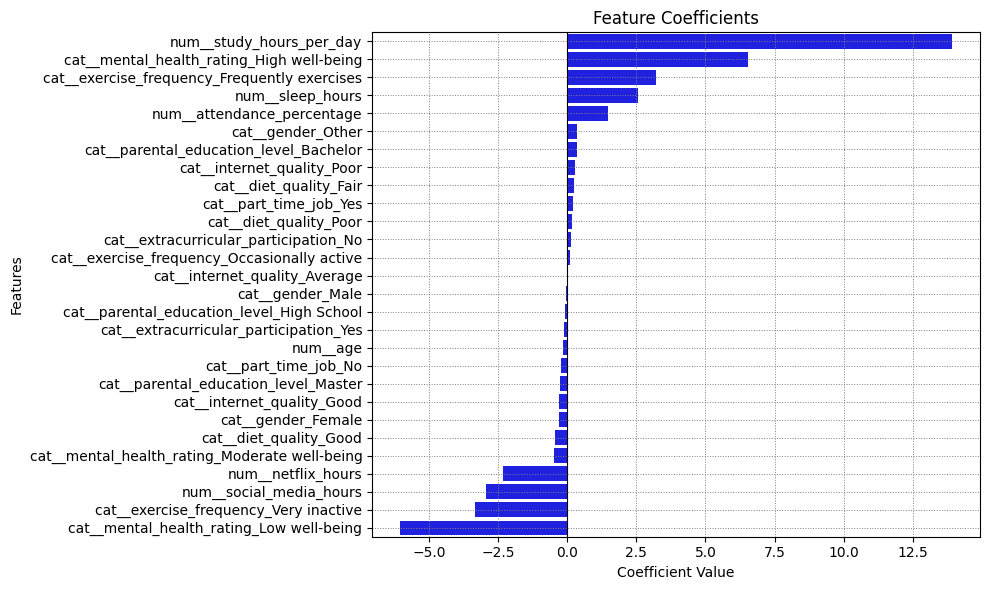


Evaluating LinearSVR...
Model: LinearSVR
Root Mean Squared Error (RMSE): 5.5453
R-squared (R2): 0.8962
--------------------------------------------------------------------------------
Feature Coef...
                                         Feature  Coefficient
1                       num__study_hours_per_day    13.796084
25     cat__mental_health_rating_High well-being    12.121039
22  cat__exercise_frequency_Frequently exercises     8.928109
9                          cat__part_time_job_No     8.753005
20         cat__extracurricular_participation_No     8.704633


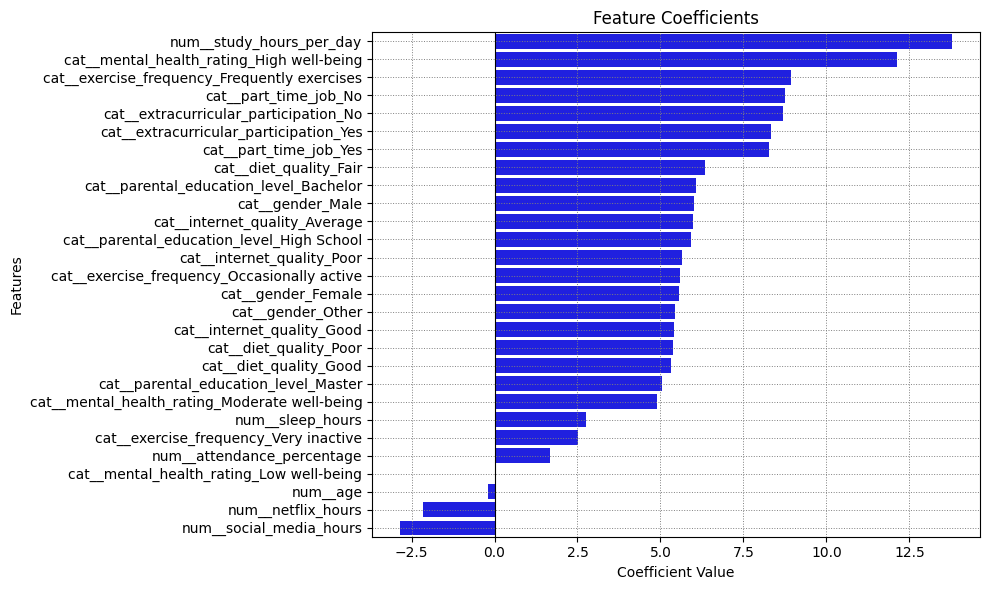


Evaluating ElasticNet...
Model: ElasticNet
Root Mean Squared Error (RMSE): 5.7036
R-squared (R2): 0.8902
--------------------------------------------------------------------------------
Feature Coef...
                                         Feature  Coefficient
1                       num__study_hours_per_day    13.182487
25     cat__mental_health_rating_High well-being     5.895711
22  cat__exercise_frequency_Frequently exercises     2.638809
5                               num__sleep_hours     2.348254
4                     num__attendance_percentage     1.343220


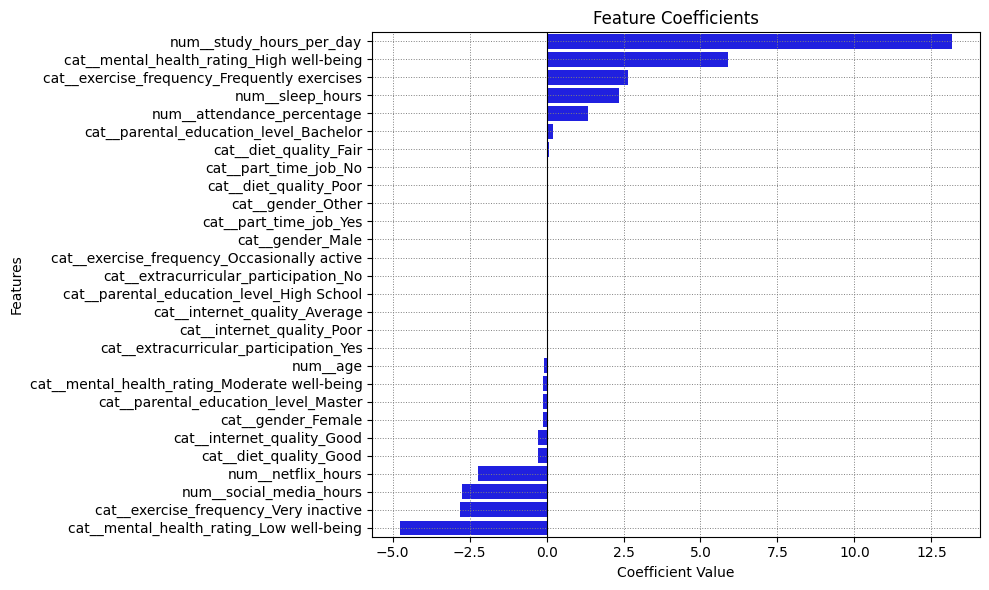

In [284]:
X_test = strat_test_set.drop("exam_score", axis=1)
y_test = strat_test_set["exam_score"].copy()
X_test_prepared = preprocessor.transform(X_test)

# Train and evaluate each regression model
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")
    evaluate_model(model, X_train = df_student_new_prepared, 
                   X_test = X_test_prepared , y_train = df_student_new_labels, y_test = y_test)
    print()    

**Insight** <br>
- All four models show that features: `study_hours_per_day`, `mental_health_rating` (High well-being) and `exercise_frequency` (Frequently exercises) are the most influential features. Furthermore, both features: `netflix_hours` and `social_media_hours` have a negative impact on exam scores.

Based on the results, can consider using **Ridge** or **LinearRegression** for predictions, as they offer the best balance between accuracy and error in this case. 

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #a63603; /* Darker warm brown to match palette */
    padding: 20px; 
    background: linear-gradient(135deg, #d73027, #fdae61, #a6d96a, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #ffffff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
